<a href="https://colab.research.google.com/github/pchlenski/aPTR/blob/main/notebooks/sampling_thresholds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Minimal imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle as p

# google colab specific stuff
from google.colab import drive
drive.mount('/content/drive')

dd = '/content/drive/My Drive/notebooks/16s/data/' # data directory

In [ ]:
# pandas settings
%load_ext google.colab.data_table

# fonts
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/drive/My Drive/fonts/Helvetica.ttf')

font = {
    'family' : 'Helvetica', 
    'size' : 24
}
mpl.rc('font', **font)

# colors - consistent with google slides 'basic light' defaults
red = '#be1e2d'
blue = '#0097a7'
yellow = '#ffab40'

# other settings
mpl.rcParams['figure.dpi'] = 350
mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['figure.frameon'] = False
mpl.rcParams['image.cmap'] = 'magma'
mpl.rcParams['patch.facecolor'] = '#00000000'
mpl.rcParams['legend.framealpha'] = 0
mpl.rcParams['axes.facecolor'] = '#fffff800'
mpl.rcParams['axes.linewidth'] = 2

# turn off spines
# mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.left'] = False

In [ ]:
!pip install biopython
!git clone https://github.com/pchlenski/aPTR
!cd /content/aPTR && git pull

from aPTR.src.db import RnaDB
from aPTR.util.simulation import generate_otu_matrix
from aPTR.src.solver import solve_matrix
# from aPTR.test.tests import *

     |████████████████████████████████| 2.3 MB 14.7 MB/s 
Cloning into 'aPTR'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 277 (delta 138), reused 172 (delta 66), pack-reused 0
Receiving objects: 100% (277/277), 19.06 MiB | 5.39 MiB/s, done.
Resolving deltas: 100% (138/138), done.
Already up to date.


In [ ]:
db = RnaDB(f"{dd}/db.pkl", f"{dd}/collisions.pkl")

In [ ]:
# Vary these params as desired
n_genomes = 150
# n_genomes = len(db.genomes)
n_samples = 10
exp_scale = 1e4

# Generate PTR and coverage matrices
genomes = np.random.choice(db.genomes, size=n_genomes, replace=False)
# genomes = db.genomes
samples = [f"sample_{n}" for n in range(n_samples)]

ptrs = pd.DataFrame(
    1 + np.random.rand(n_genomes, n_samples), 
    index=genomes, 
    columns=samples
)
covs = pd.DataFrame(
    np.random.exponential(size=(n_genomes, n_samples), scale=exp_scale).astype(int),
    index=genomes,
    columns=samples
)

In [ ]:
# plot errors

matrix = generate_otu_matrix(db, ptrs, covs, verbose=True)
solution = solve_matrix(db, matrix, ptrs)


Row: 0
Row: 1
Row: 2
Row: 3
Row: 4
Row: 5
Row: 6
Row: 7
Row: 8
Row: 9
Row: 10
Row: 11
Row: 12
Row: 13
Row: 14
Row: 15
Row: 16
Row: 17
Row: 18
Row: 19
Row: 20
Row: 21
Row: 22
Row: 23
Row: 24
Row: 25
Row: 26
Row: 27
Row: 28
Row: 29
Row: 30
Row: 31
Row: 32
Row: 33
Row: 34
Row: 35
Row: 36
Row: 37
Row: 38
Row: 39
Row: 40
Row: 41
Row: 42
Row: 43
Row: 44
Row: 45
Row: 46
Row: 47
Row: 48
Row: 49
Row: 50
Row: 51
Row: 52
Row: 53
Row: 54
Row: 55
Row: 56
Row: 57
Row: 58
Row: 59
Row: 60
Row: 61
Row: 62
Row: 63
Row: 64
Row: 65
Row: 66
Row: 67
Row: 68
Row: 69
Row: 70
Row: 71
Row: 72
Row: 73
Row: 74
Row: 75
Row: 76
Row: 77
Row: 78
Row: 79
Row: 80
Row: 81
Row: 82
Row: 83
Row: 84
Row: 85
Row: 86
Row: 87
Row: 88
Row: 89
Row: 90
Row: 91
Row: 92
Row: 93
Row: 94
Row: 95
Row: 96
Row: 97
Row: 98
Row: 99
Row: 100
Row: 101
Row: 102
Row: 103
Row: 104
Row: 105
Row: 106
Row: 107
Row: 108
Row: 109
Row: 110
Row: 111
Row: 112
Row: 113
Row: 114
Row: 115
Row: 116
Row: 117
Row: 118
Row: 119
Row: 120
Row: 121
Row: 122
Row

/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '637387.12'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '164757.10'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '189918.11'
Collision for 04efd0ae1d2b49d000fdcbefdaa2c1bd. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 1882a339641d6d96230e74ff0a806a02. Skipping this sequence...
Collision for 1fbd0b75d1ff0c3c47ba78efd883eb83. Skipping this sequence...
Collision for 2482a2916bdded0ae5d8372de802a686. Skipping this sequence...
Collision for 25de5b142d0329080bf0a407b7dea12a. Skipping this sequence...
Collision for 2f0f6ce3b7a2247597788943a9eb2204. Skipping this sequence...
Collision for 32d18b5b98ae0166e51dd1f1ec46c532. Skipping this sequence...
Collision for 3f74649b94baa8ef2670df7e7f150da9. Skipping this sequence...
Collision for 76d227bb671fdd5bdb376f8085e4e1bb. Skipping this sequence...
Collision for 7bcd9272d460558f43044908eaad6b34. Skipping this sequence...
Collision for 9c9b2305916715fd18d7c5b3e6781afe. Skipping this sequence...
Collision for 9cbeb2643b880f3ad15a4bf0423b946b. Skipping th

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2600.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '189918.11'
Collision for 04efd0ae1d2b49d000fdcbefdaa2c1bd. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 1882a339641d6d96230e74ff0a806a02. Skipping this sequence...
Collision for 1fbd0b75d1ff0c3c47ba78efd883eb83. Skipping this sequence...
Collision for 2482a2916bdded0ae5d8372de802a686. Skipping this sequence...
Collision for 25de5b142d0329080bf0a407b7dea12a. Skipping this sequence...
Collision for 2f0f6ce3b7a2247597788943a9eb2204. Skipping this sequence...
Collision for 32d18b5b98ae0166e51dd1f1ec46c532. Skipping this sequence...
Collision for 3f74649b94baa8ef2670df7e7f150da9. Skipping this sequence...
Collision for 76d227bb671fdd5bdb376f8085e4e1bb. Skipping this sequence...
Collision for 7bcd9272d460558f43044908eaad6b34. Skipping this sequence...
Collision for 9c9b2305916715fd18d7c5b3e6781afe. Skipping this sequence...
Collis

In [ ]:
# Correlate error and coverage
merged = pd.DataFrame(columns=["ptr", "coverage", "error"])
merged["ptr"] = ptrs.stack()
merged["coverage"] = covs.stack()
merged["error"] = solution.set_index(["genome", "sample"])["err"]

merged

ptr  coverage     error
1002809.3 sample_0  1.907397     30281  0.087775
          sample_1  1.356364     19891  0.080553
          sample_2  1.658526     27023  0.005916
          sample_3  1.798555     18478  0.003268
          sample_4  1.115091     31675  0.027477
...                      ...       ...       ...
644076.3  sample_5  1.533690      7533  0.166865
          sample_6  1.978197      1196  0.113668
          sample_7  1.565102      8586  0.347334
          sample_8  1.657885     12971  0.146889
          sample_9  1.875100      1577  0.170993

[1500 rows x 3 columns]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


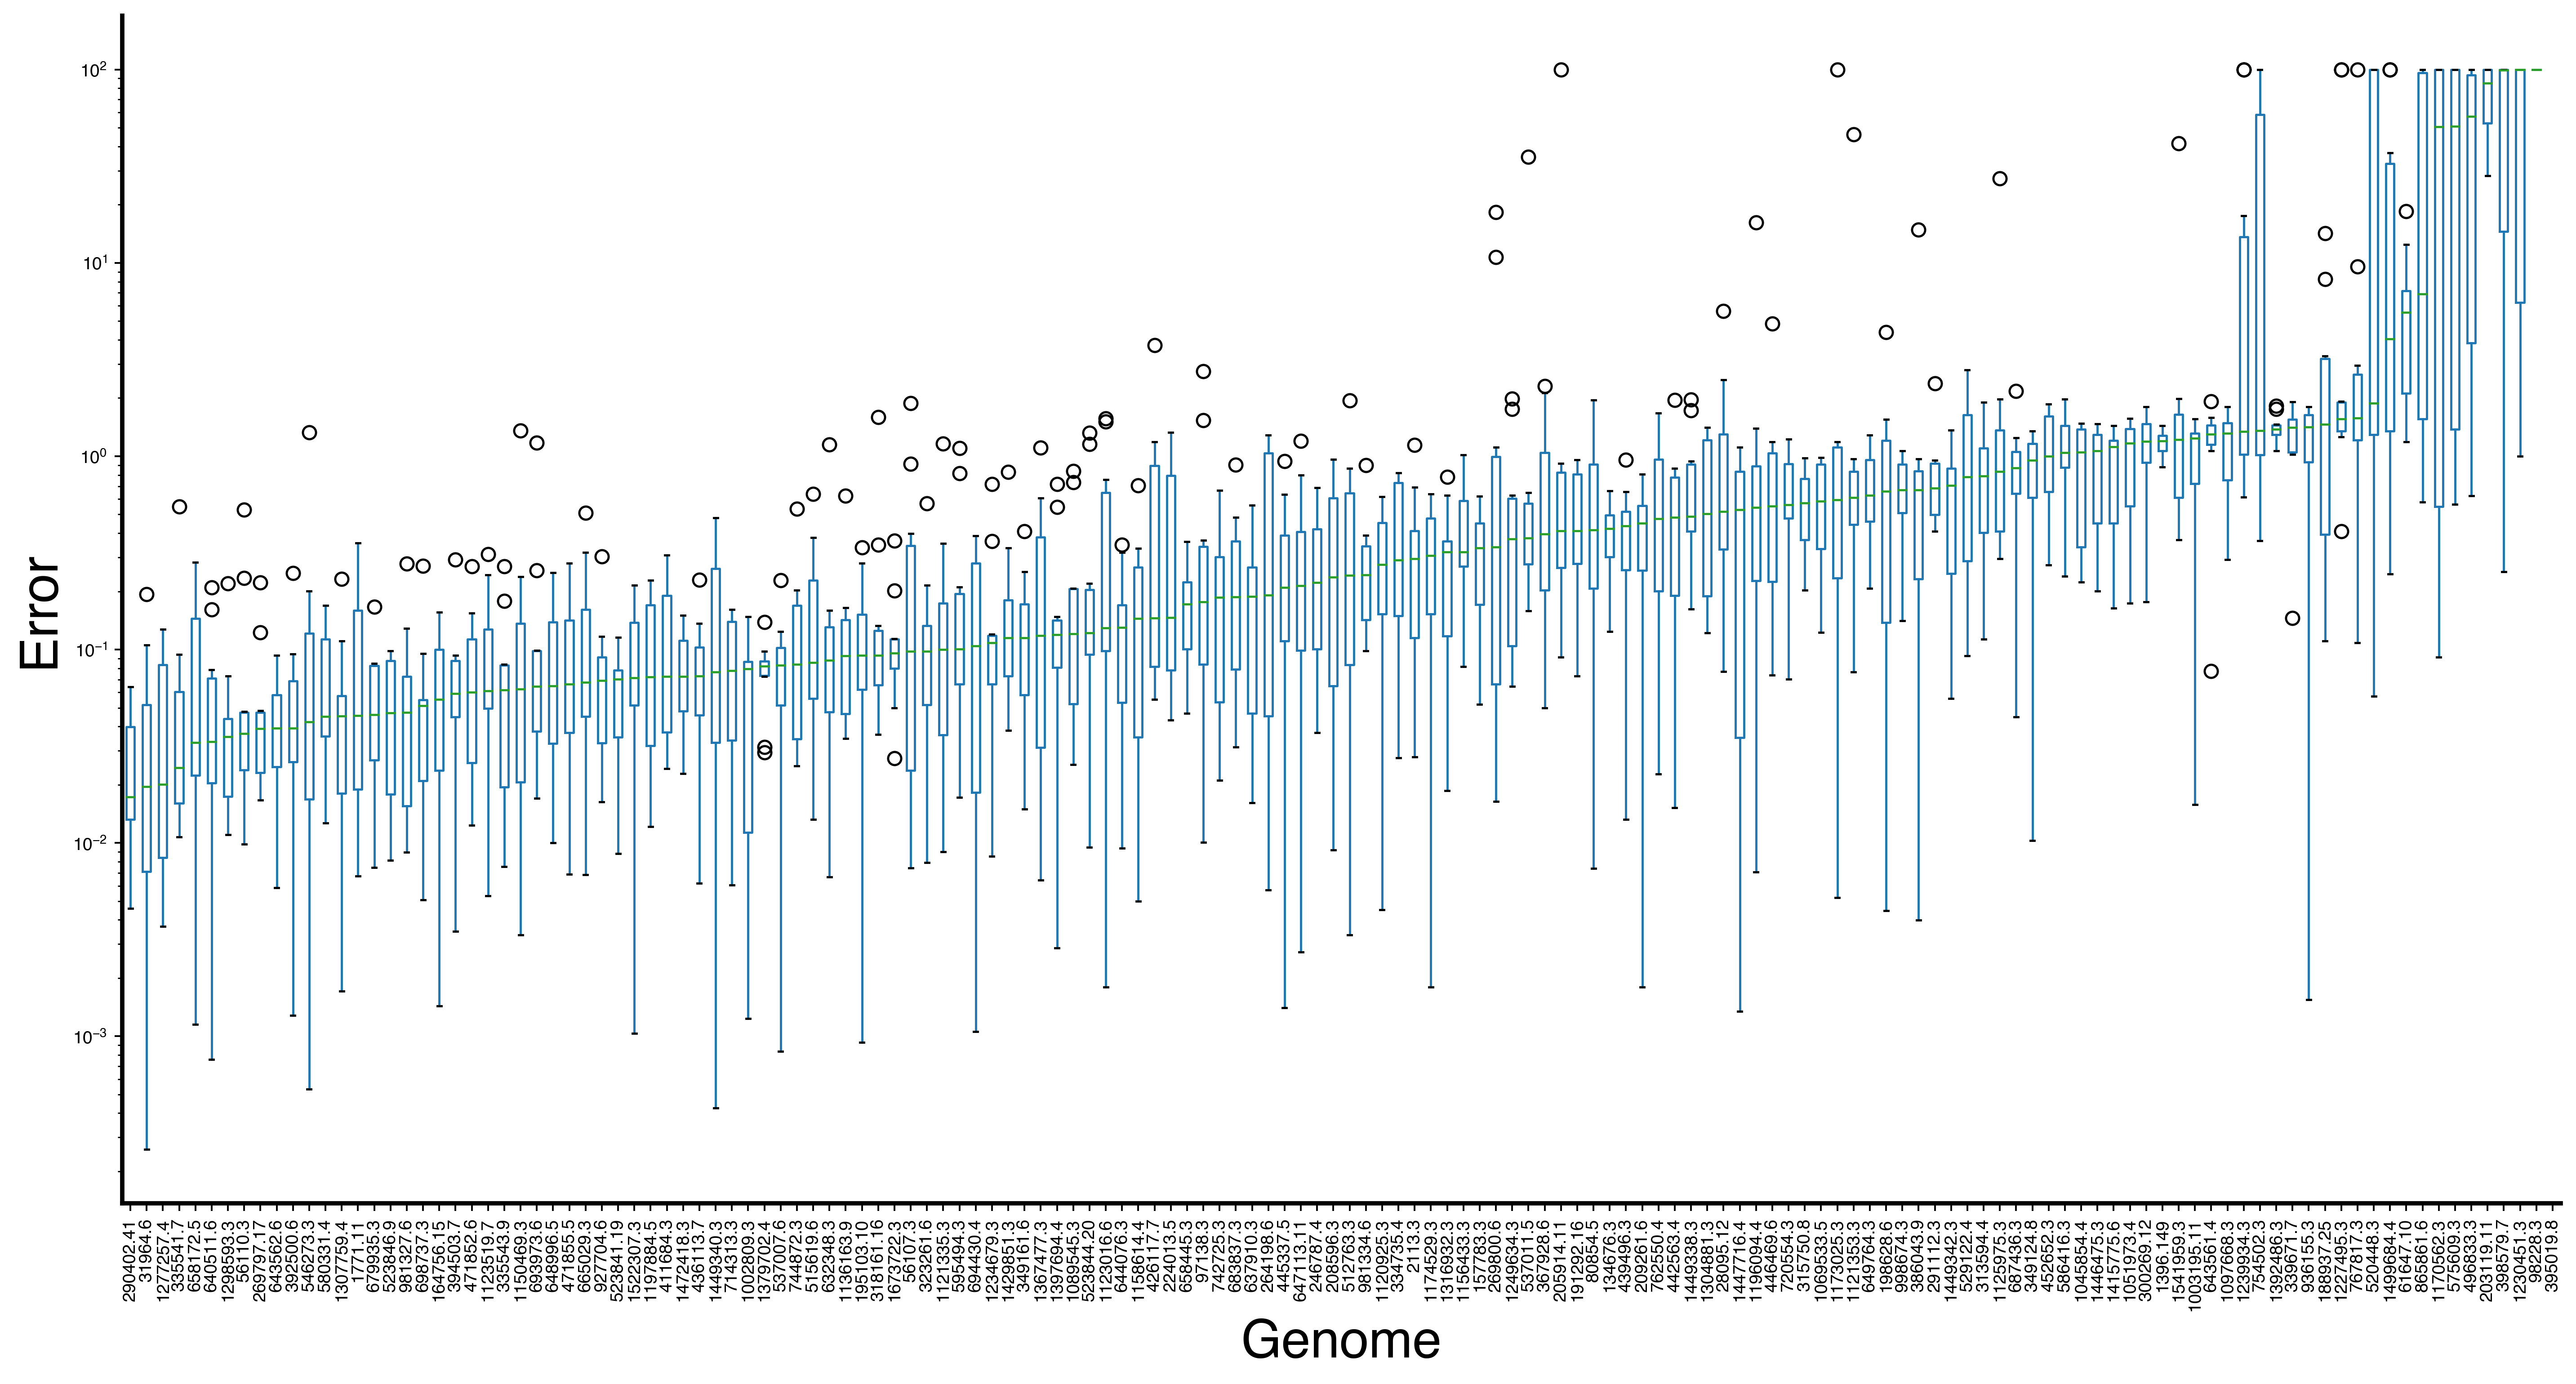

In [ ]:
# Show errors as boxplots

fig = plt.figure(figsize=(20,10))
to_plot = merged.reset_index()[["level_0", "error"]]
to_plot["error"] = np.clip(to_plot["error"], 0, 100)
grouped = to_plot.groupby("level_0")

# sort: inspired by https://stackoverflow.com/questions/21912634/how-can-i-sort-a-boxplot-in-pandas-by-the-median-values
df2 = pd.DataFrame({col:vals["error"] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=True, inplace=True)
df2 = df2[meds.index]
df2.boxplot(fontsize=8, rot=90, grid=False)

# clean up labels
ticks, labels = plt.xticks()
new_labels = [x._text.split(",")[0].lstrip("(") for x in labels]
plt.xticks(ticks, new_labels)
plt.yscale("log")
plt.xlabel("Genome")
plt.ylabel("Error")

plt.show()

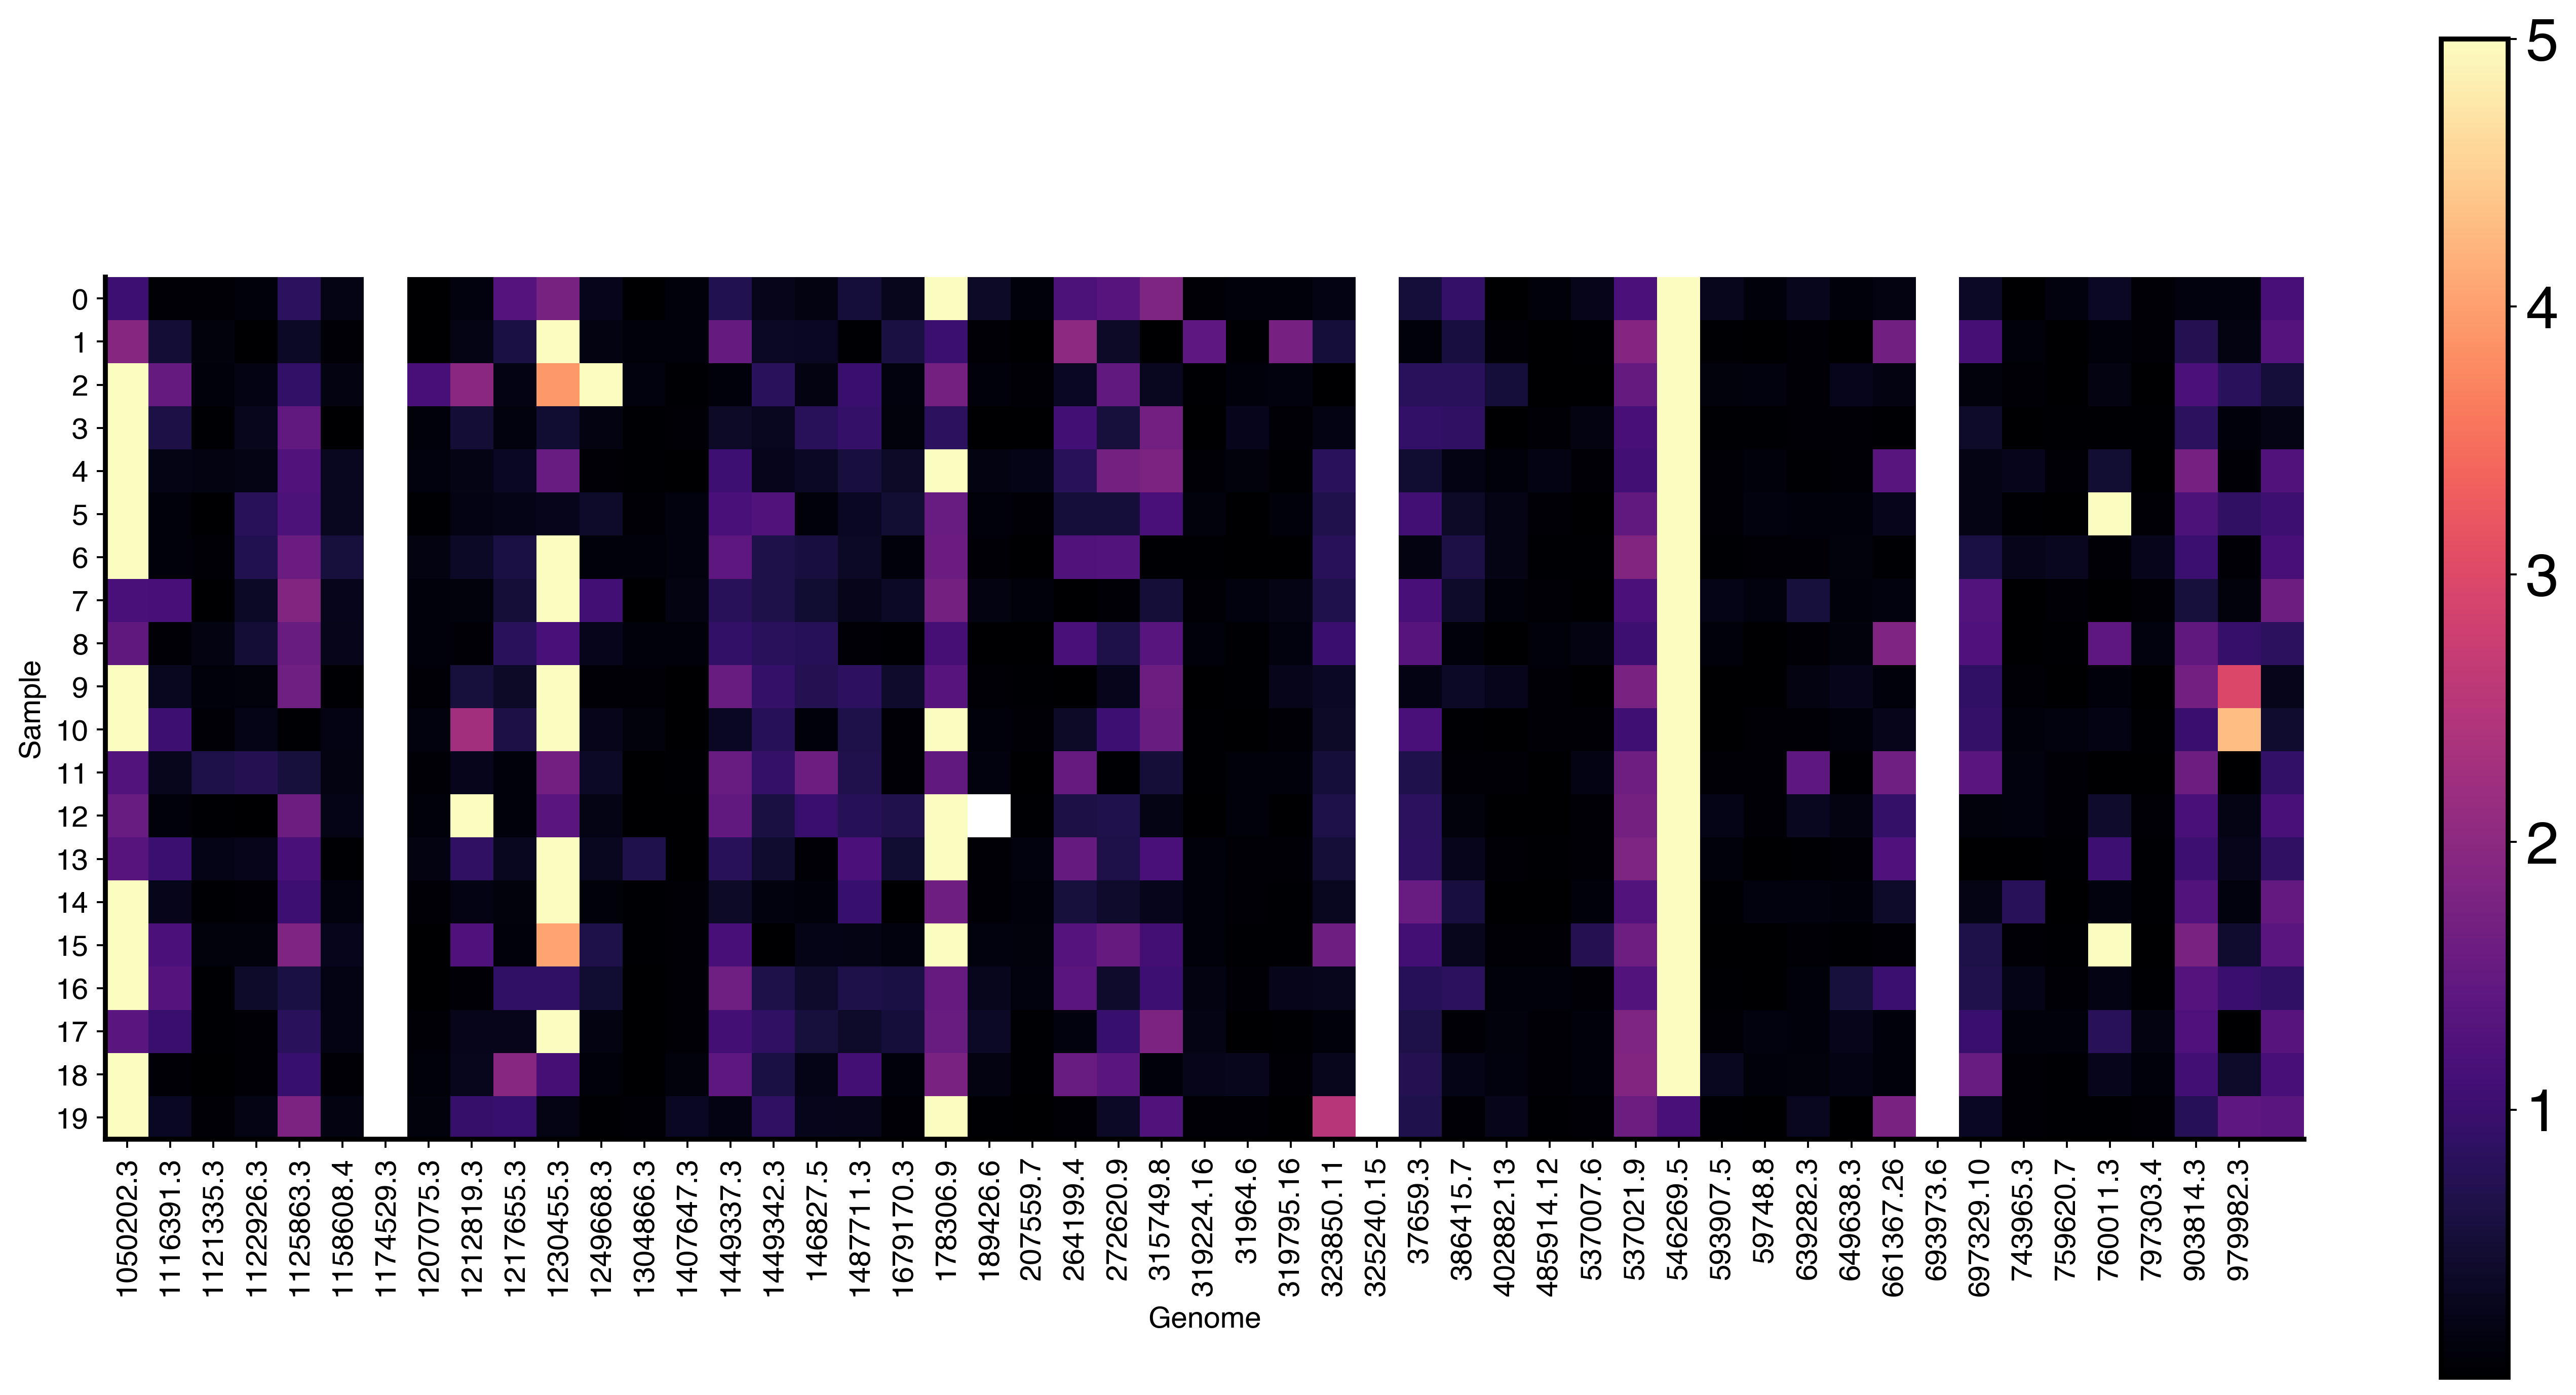

In [ ]:
fig = plt.figure(figsize=(20,10))
pivot = solution.pivot("genome", "sample", "err")
plt.imshow(pivot.transpose(), vmax=5)
plt.yticks(range(n_samples), range(n_samples), fontsize=12)
plt.xticks(range(n_genomes), pivot.index, fontsize=12, rotation=90)
plt.ylabel("Sample", fontsize=12)
plt.xlabel("Genome", fontsize=12)
plt.colorbar()

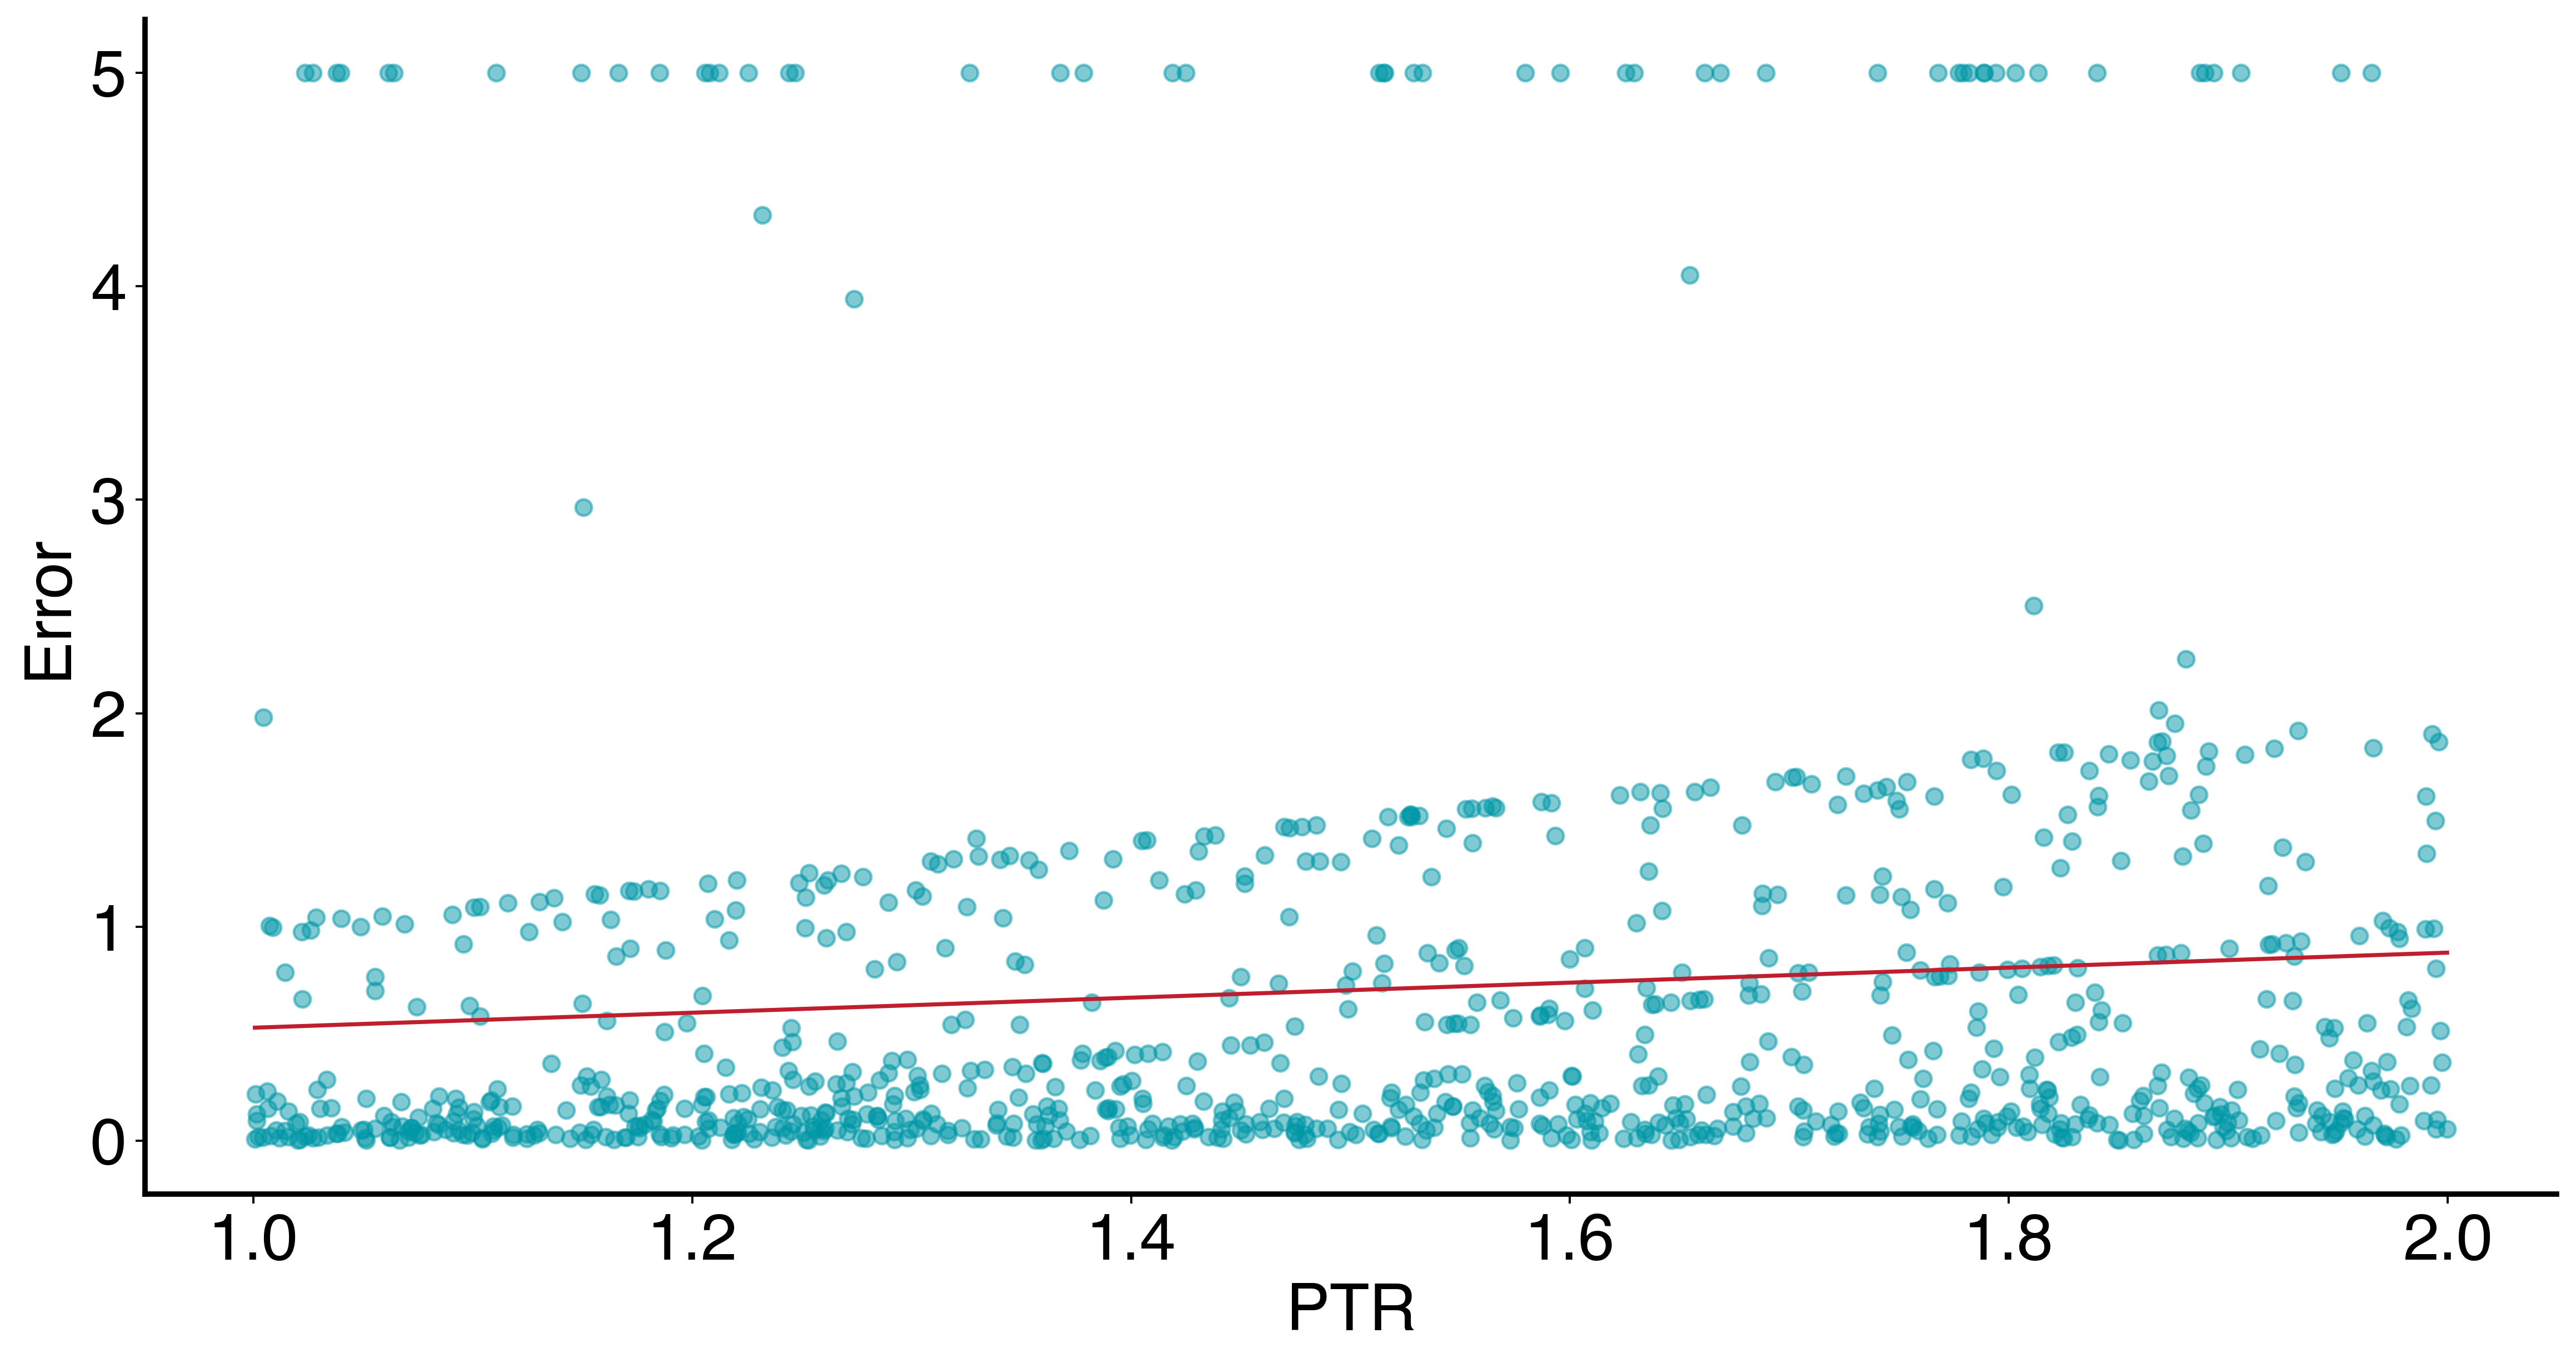

In [ ]:
x = merged.dropna()["ptr"]
y = np.clip(merged.dropna()["error"], 0, 5)
            
plt.scatter(x, y, c=blue, alpha=0.5)
plt.xlabel("PTR")
plt.ylabel("Error")

# best fit
par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(x), max(x)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, c=red)

Text(0, 0.5, 'Error')

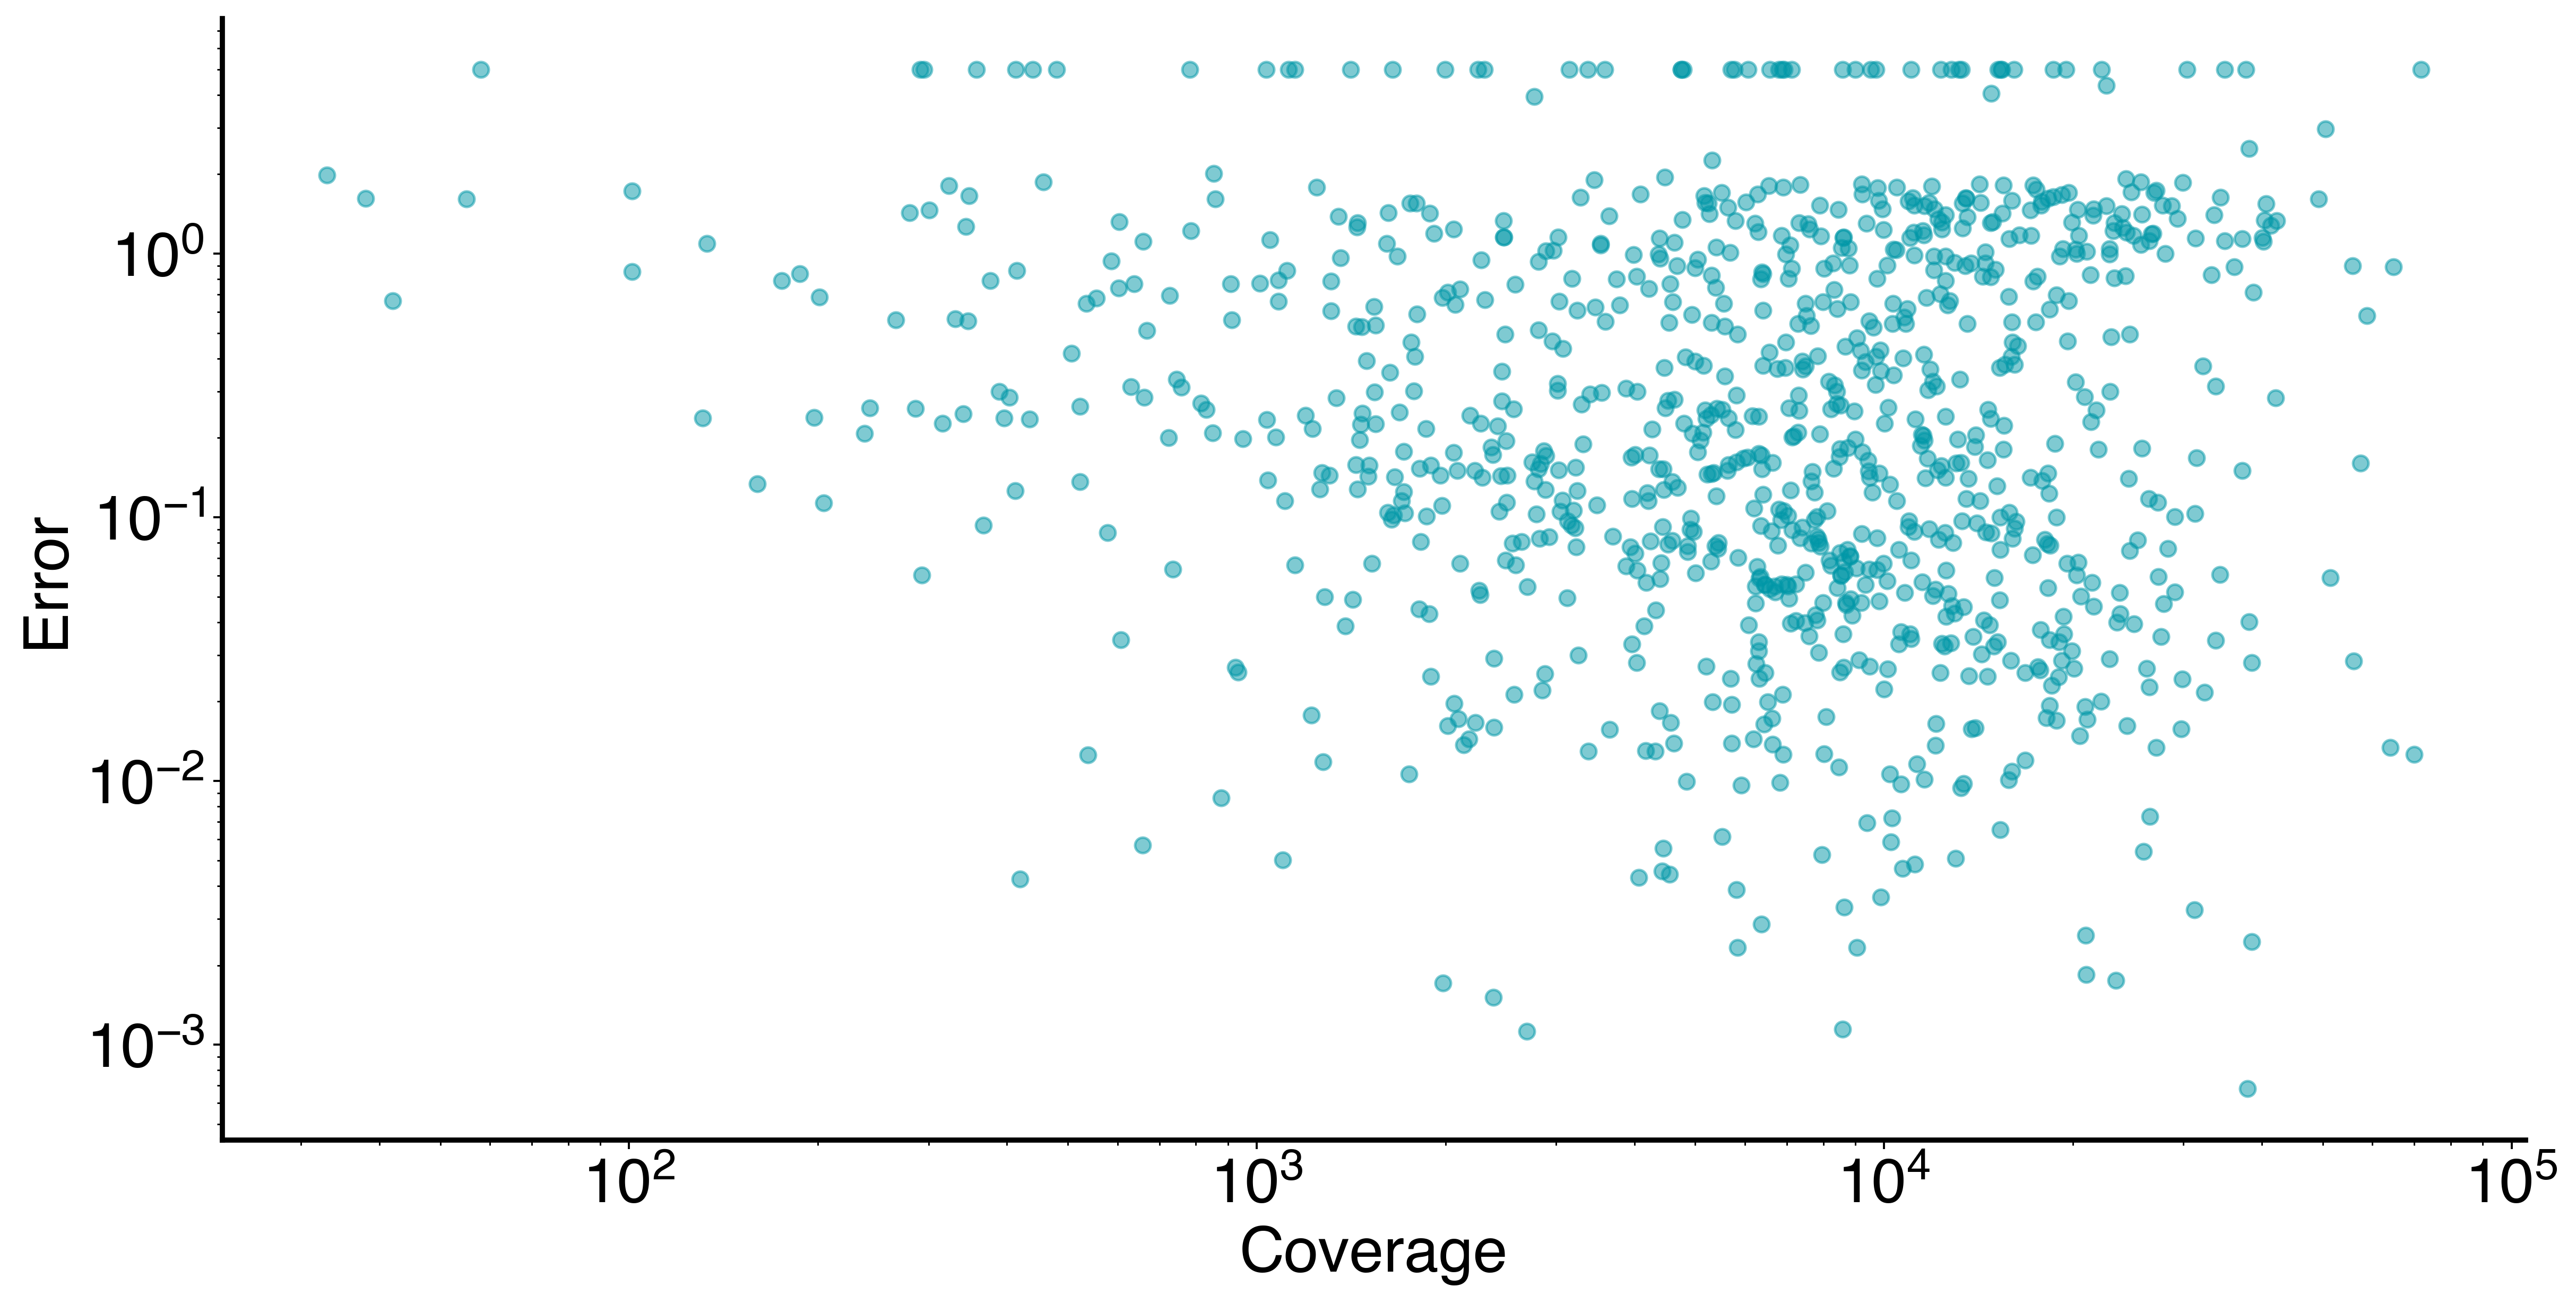

In [ ]:
x = merged.dropna()["coverage"]
y = np.clip(merged.dropna()["error"], 0, 5)
            
plt.scatter(x, y, c=blue, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Coverage")
plt.ylabel("Error")

In [ ]:
# Sample from scale of ~.001 to ~100,000 
all_errors = pd.DataFrame(columns=["scale", "genome", "err"])
for i in range(6):
    scale = 10**i / 1e3
    print(f"Sampling at scale {scale}")
    matrix = generate_otu_matrix(db, ptrs, covs, scale=scale)
    solution = solve_matrix(db, matrix, ptrs)
    errors = solution[["genome", "err"]]
    errors["scale"] = scale
    all_errors = all_errors.append(errors)

Sampling at scale 0.001
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Sampling at scale 0.01
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 8

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066e

/content/aPTR/src/solver.py:256: RuntimeWarning: overflow encountered in double_scalars
  ptr = peak / trough


Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Sampling at scale 100.0
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


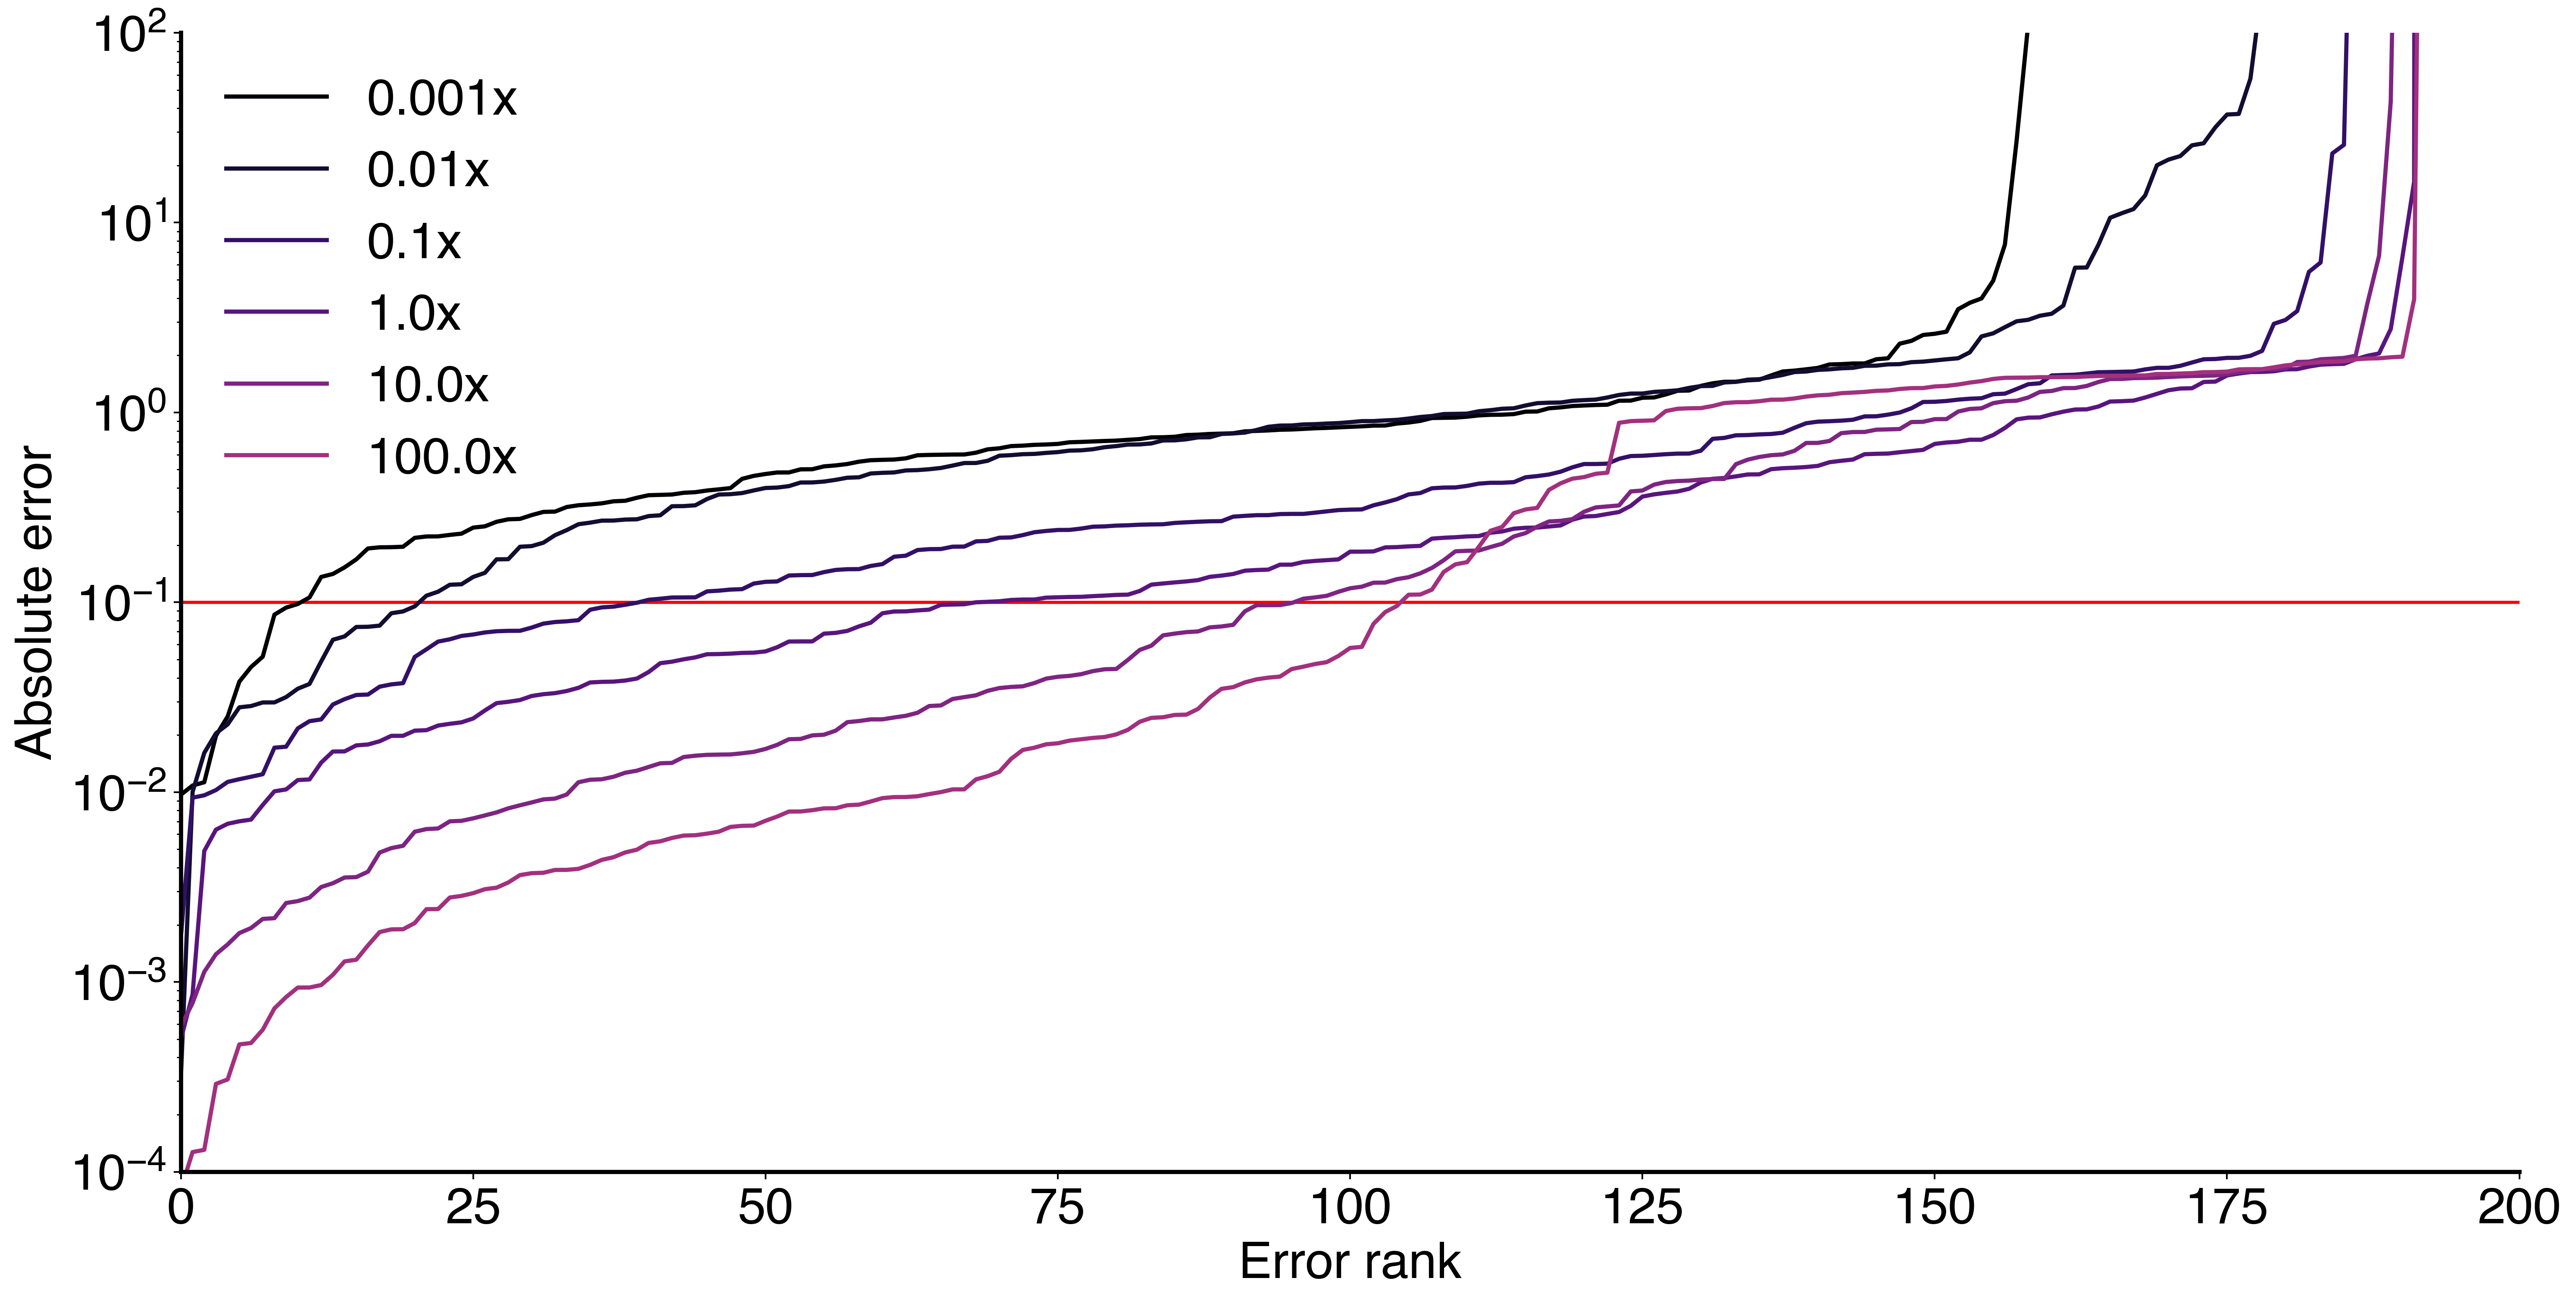

In [ ]:
fig = plt.figure(figsize=(20,10))

colors = mpl.cm.get_cmap('magma', 12)

for idx, scale in enumerate(all_errors["scale"].unique()):
    errs = all_errors[all_errors["scale"] == scale]
    sorted_errors = np.sort(errs["err"])
    sorted_errors[np.isinf(sorted_errors)] = 1e6 # prevent overflows
    plt.plot(sorted_errors, label=f"{scale}x", lw=2, color=colors.colors[idx])

plt.yscale("log")
plt.xlim(0, n_genomes * n_samples)
plt.ylim(1e-4, 100)
plt.ylabel("Absolute error")
plt.xlabel("Error rank")
plt.hlines(.1, -10, 1e3, colors='red')
plt.legend()

In [ ]:
all_errors

scale     genome         err
0      0.001   935568.3    1.642808
1      0.001   60481.13    0.675053
2      0.001   452662.3  112.600613
3      0.001   644284.3    1.789569
4      0.001   262543.8    0.777014
..       ...        ...         ...
195  100.000   665937.3    0.006663
196  100.000   262543.8    1.640300
197  100.000   867900.3    0.904311
198  100.000  634497.12    0.001090
199  100.000   357804.7    1.537155

[1183 rows x 3 columns]

<Figure size 7000x3500 with 0 Axes>

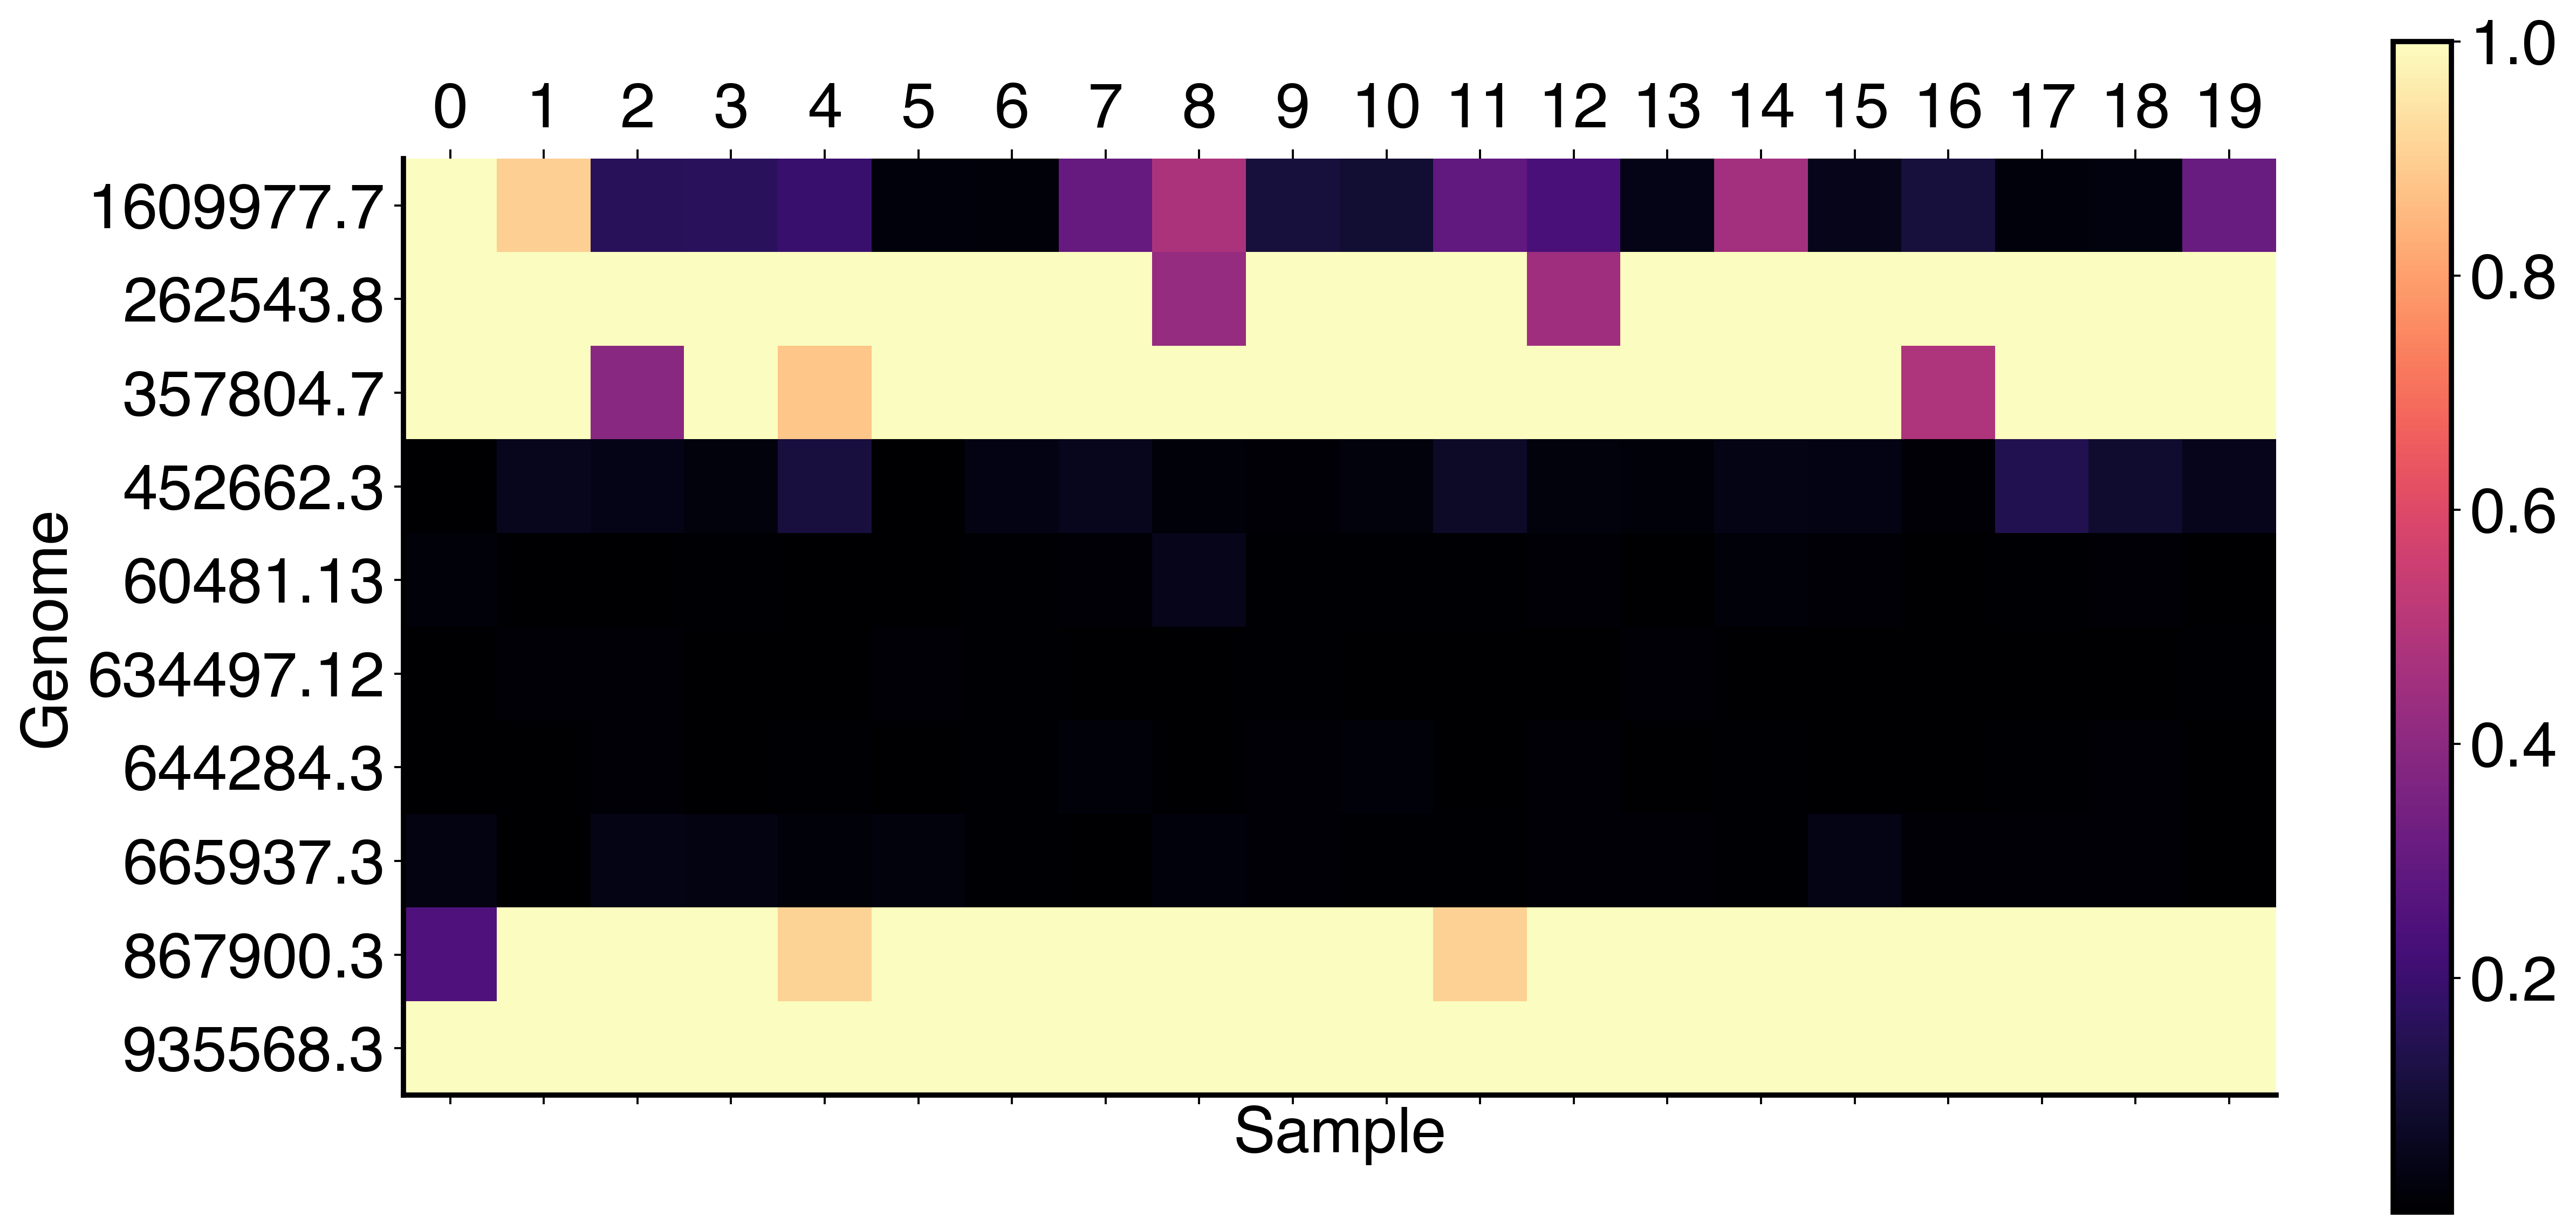

In [ ]:
fig = plt.figure(figsize=(20,10))
pivot = solution.pivot("genome", "sample", "err")
plt.matshow(pivot, vmax=1)
plt.xticks(range(n_samples), range(n_samples))
plt.yticks(range(n_genomes), pivot.index)
plt.xlabel("Sample")
plt.ylabel("Genome")
plt.colorbar()

In [ ]:
# Let's get average errors for ALL the genomes

all_solutions = pd.DataFrame()

non_colliding_genomes = set(db.genomes) - set(db.collisions["genome"].unique())
non_colliding_genomes = list(non_colliding_genomes)
print(len(non_colliding_genomes))

n_samples = 10
samples = [f"sample_{n}" for n in range(n_samples)]

for idx, genome in enumerate(non_colliding_genomes):
    print(idx)
    ptrs = pd.DataFrame(1 + np.random.rand(1, n_samples), index=[genome], columns=samples)
    covs = pd.DataFrame(np.random.exponential(size=(1, n_samples), scale=exp_scale).astype(int), index=[genome], columns=samples)

    try:
        matrix = generate_otu_matrix(db, ptrs, covs)
        solution = solve_matrix(db, matrix, ptrs)

        all_solutions = all_solutions.append(solution)
    except:
        print("Error here")

print("Done!")

1177
0
1


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


2


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


3


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


4


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


5


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


6


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


7


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


8


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


9


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


10


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


11


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


12
13


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


14


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
15


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


16


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


17


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


18


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
19


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
20


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


21


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


22


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
23


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


24


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


25


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


26


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


27


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


28


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


29
30


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


31
32
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
33


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


34


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


35


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


36


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


37


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


38


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


39


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


40


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


41


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


42


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


43


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


44


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


45


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


46


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


47


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


48


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


49


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


50


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


51


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


52


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


53


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


54
55


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


56


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
57
Collision for 04d2fa01855d0b38d42c823c7efcbc68. Skipping this sequence...
Collision for a664b6bfcd47f41c2dfe6ee15905300e. Skipping this sequence...
Collision for 04d2fa01855d0b38d42c823c7efcbc68. Skipping this sequence...
Collision for a664b6bfcd47f41c2dfe6ee15905300e. Skipping this sequence...
Collision for 04d2fa01855d0b38d42c823c7efcbc68. Skipping this sequence...
Collision for a664b6bfcd47f41c2dfe6ee15905300e. Skipping this sequence...
Collision for 04d2fa018

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


58


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


59


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


60


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


61


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


62


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


63


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


64
65


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


66


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


67


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


68


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


69


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


70


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


71


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


72


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


73


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


74


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


75


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


76


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


77


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


78


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


79


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


80


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


81


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


82


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


83


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


84
85


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


86


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


87


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


88


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


89


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


90


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


91


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


92


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


93


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


94


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


95


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


96


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


97


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


98


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
99


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


100


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


101


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
102


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


103


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


104
105


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2400.
  warnings.warn(msg, RuntimeWarning)


106


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


107


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


108


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


109


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


110


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


111


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


112


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


113
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
114


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


115
116
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6e

/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


118


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


119


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


120


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


121


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


122


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


123


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


124


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


125


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


126


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


127


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


128


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


129


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


130


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


131


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


132


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


133


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


134


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


135


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
136


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


137


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


138


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


139


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


140


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


141


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


142


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


143


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


144
145


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


146


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


147


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


148


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


149
150


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


151


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


152


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


153


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


154


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


155


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


156


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


157


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


158


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


159


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


160


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


161


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


162


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


163


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


164


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


165


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


166


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


167


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


168


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


169


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


170


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
171


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


172
173


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 3200.
  warnings.warn(msg, RuntimeWarning)


174


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


175


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


176
177


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


178


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


179


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


180


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


181


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


182


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


183


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


184


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


185


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


186


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


187


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


188


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


189


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


190


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


191


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


192


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


193


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


194


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


195
Collision for f82e02a3ae292990359e21e6968c3675. Skipping this sequence...
Collision for f82e02a3ae292990359e21e6968c3675. Skipping this sequence...
Collision for f82e02a3ae292990359e21e6968c3675. Skipping this sequence...
Collision for f82e02a3ae292990359e21e6968c3675. Skipping this sequence...
Collision for f82e02a3ae292990359e21e6968c3675. Skipping this sequence...
Collision for f82e02a3ae292990359e21e6968c3675. Skipping this sequence...
Collision for f82e02a3ae292990359e21e6968c3675. Skipping this sequence...
Collision for f82e02a3ae292990359e21e6968c3675. Skipping this sequence...
Collision for f82e02a3ae292990359e21e6968c3675. Skipping this sequence...
Collision for f82e02a3ae292990359e21e6968c3675. Skipping this sequence...
196


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


197


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


198


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


199


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


200


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


201
202


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


203


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


204
205


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


206


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


207


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


208


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


209


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


210


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


211


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


212


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


213


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


214


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


215


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


216


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


217


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


218


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


219


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


220


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


221


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


222


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


223


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


224


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


225


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


226


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


227


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


228


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


229


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


230


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


231


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


232


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


233


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


234


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


235


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


236


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


237


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


238


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


239


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


240
241


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '187410.11'
True PTR evaluation: Bypassing KeyError: '187410.11'
True PTR evaluation: Bypassing KeyError: '187410.11'
True PTR evaluation: Bypassing KeyError: '187410.11'
True PTR evaluation: Bypassing KeyError: '187410.11'
True PTR evaluation: Bypassing KeyError: '187410.11'
True PTR evaluation: Bypassing KeyError: '187410.11'
True PTR evaluation: Bypassing KeyError: '187410.11'
True PTR evaluation: Bypassing KeyError: '187410.11'
True PTR evaluation: Bypassing KeyError: '187410.11'
242
243


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


244


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


245


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


246


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


247


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


248


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


249


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


250
Collision for cd957d79509eb0db475a17cdbcf84994. Skipping this sequence...
Collision for cd957d79509eb0db475a17cdbcf84994. Skipping this sequence...
Collision for cd957d79509eb0db475a17cdbcf84994. Skipping this sequence...
Collision for cd957d79509eb0db475a17cdbcf84994. Skipping this sequence...
Collision for cd957d79509eb0db475a17cdbcf84994. Skipping this sequence...
Collision for cd957d79509eb0db475a17cdbcf84994. Skipping this sequence...
Collision for cd957d79509eb0db475a17cdbcf84994. Skipping this sequence...
Collision for cd957d79509eb0db475a17cdbcf84994. Skipping this sequence...
Collision for cd957d79509eb0db475a17cdbcf84994. Skipping this sequence...
Collision for cd957d79509eb0db475a17cdbcf84994. Skipping this sequence...
251


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


252


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


253
254


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


255


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


256


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


257


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


258


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


259


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


260


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


261


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '502801.6'
True PTR evaluation: Bypassing KeyError: '502801.6'
True PTR evaluation: Bypassing KeyError: '502801.6'
True PTR evaluation: Bypassing KeyError: '502801.6'
True PTR evaluation: Bypassing KeyError: '502801.6'
True PTR evaluation: Bypassing KeyError: '502801.6'
True PTR evaluation: Bypassing KeyError: '502801.6'
True PTR evaluation: Bypassing KeyError: '502801.6'
True PTR evaluation: Bypassing KeyError: '502801.6'
True PTR evaluation: Bypassing KeyError: '502801.6'
262


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


263


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


264


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


265


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


266


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


267


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


268


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


269


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


270


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


271
Collision for 0fc0d02136637ce93e4180f112f56955. Skipping this sequence...
Collision for 4bd77add55d5cc2fcfe1b3842fb3c3df. Skipping this sequence...
Collision for 505817f422fb8d1dc02609d9ad06c043. Skipping this sequence...
Collision for 0fc0d02136637ce93e4180f112f56955. Skipping this sequence...
Collision for 4bd77add55d5cc2fcfe1b3842fb3c3df. Skipping this sequence...
Collision for 505817f422fb8d1dc02609d9ad06c043. Skipping this sequence...
Collision for 0fc0d02136637ce93e4180f112f56955. Skipping this sequence...
Collision for 4bd77add55d5cc2fcfe1b3842fb3c3df. Skipping this sequence...
Collision for 505817f422fb8d1dc02609d9ad06c043. Skipping this sequence...
Collision for 0fc0d02136637ce93e4180f112f56955. Skipping this sequence...
Collision for 4bd77add55d5cc2fcfe1b3842fb3c3df. Skipping this sequence...
Collision for 505817f422fb8d1dc02609d9ad06c043. Skipping this sequence...
Collision for 0fc0d02136637ce93e4180f112f56955. Skipping this sequence...
Collision for 4bd77add55d5cc2fcfe1

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Collision for 0fc0d02136637ce93e4180f112f56955. Skipping this sequence...
Collision for 4bd77add55d5cc2fcfe1b3842fb3c3df. Skipping this sequence...
Collision for 505817f422fb8d1dc02609d9ad06c043. Skipping this sequence...
Collision for 0fc0d02136637ce93e4180f112f56955. Skipping this sequence...
Collision for 4bd77add55d5cc2fcfe1b3842fb3c3df. Skipping this sequence...
Collision for 505817f422fb8d1dc02609d9ad06c043. Skipping this sequence...
Collision for 0fc0d02136637ce93e4180f112f56955. Skipping this sequence...
Collision for 4bd77add55d5cc2fcfe1b3842fb3c3df. Skipping this sequence...
Collision for 505817f422fb8d1dc02609d9ad06c043. Skipping this sequence...
Collision for 0fc0d02136637ce93e4180f112f56955. Skipping this sequence...
Collision for 4bd77add55d5cc2fcfe1b3842fb3c3df. Skipping this sequence...
Collision for 505817f422fb8d1dc02609d9ad06c043. Skipping this sequence...
Collision for 0fc0d02136637ce93e4180f112f56955. Skipping this sequence...
Collision for 4bd77add55d5cc2fcfe1b384

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '407976.7'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '407976.7'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '407976.7'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '407976.7'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '407976.7'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '407976.7'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '407976.7'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '407976.7'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '407976.7'
True PTR evaluation: Bypassing KeyError: '402882.13'
Tr

/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


274


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


275


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


276


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


277


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


278
279


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


280


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


281


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


282


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


True PTR evaluation: Bypassing KeyError: '273119.6'
True PTR evaluation: Bypassing KeyError: '273119.6'
True PTR evaluation: Bypassing KeyError: '273119.6'
True PTR evaluation: Bypassing KeyError: '273119.6'
True PTR evaluation: Bypassing KeyError: '273119.6'
True PTR evaluation: Bypassing KeyError: '273119.6'
True PTR evaluation: Bypassing KeyError: '273119.6'
True PTR evaluation: Bypassing KeyError: '273119.6'
True PTR evaluation: Bypassing KeyError: '273119.6'
True PTR evaluation: Bypassing KeyError: '273119.6'
283


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


284


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '545693.3'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '1348623.7'
285


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


286


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


287


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


288


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


289


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


290


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


291


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


292


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


293


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


294


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


295


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


296
297


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


298


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


299


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


300


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '693973.6'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '693973.6'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '693973.6'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '693973.6'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '693973.6'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '693973.6'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '693973.6'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '693973.6'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '693973.6'
True PTR evaluation: Bypassing KeyError: '325240.15'
Tr

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


302


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


303


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


304


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


305
306


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


307


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


308


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


309


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


310


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


311
312


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


313


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


314


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


315


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


316


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


317


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


318


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


319


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


320


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '1249526.3'
321


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


322


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


323


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


324


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


325


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '496833.3'
True PTR evaluation: Bypassing KeyError: '496833.3'
True PTR evaluation: Bypassing KeyError: '496833.3'
True PTR evaluation: Bypassing KeyError: '496833.3'
True PTR evaluation: Bypassing KeyError: '496833.3'
True PTR evaluation: Bypassing KeyError: '496833.3'
True PTR evaluation: Bypassing KeyError: '496833.3'
True PTR evaluation: Bypassing KeyError: '496833.3'
True PTR evaluation: Bypassing KeyError: '496833.3'
True PTR evaluation: Bypassing KeyError: '496833.3'
326


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


327


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


328


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


329


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


330


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


331


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


332


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


333


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


334


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


335


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


336


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


337


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


338


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


339


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


340


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


341


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


342


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


343


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


344


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


345


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


346


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


347


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


True PTR evaluation: Bypassing KeyError: '1235479.3'
True PTR evaluation: Bypassing KeyError: '1235479.3'
True PTR evaluation: Bypassing KeyError: '1235479.3'
True PTR evaluation: Bypassing KeyError: '1235479.3'
True PTR evaluation: Bypassing KeyError: '1235479.3'
True PTR evaluation: Bypassing KeyError: '1235479.3'
True PTR evaluation: Bypassing KeyError: '1235479.3'
True PTR evaluation: Bypassing KeyError: '1235479.3'
True PTR evaluation: Bypassing KeyError: '1235479.3'
True PTR evaluation: Bypassing KeyError: '1235479.3'
348


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


349


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


350


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


351


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


352


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


353


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


354
355


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2200.
  warnings.warn(msg, RuntimeWarning)


356
357
358


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


359


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


360


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


361


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


362


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


363


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


364


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


365


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '1647

/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


367


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


368


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


369


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


370


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


371


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


372


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '315730.11'
True PTR evaluation: Bypassing KeyError: '315730.11'
True PTR evaluation: Bypassing KeyError: '315730.11'
True PTR evaluation: Bypassing KeyError: '315730.11'
True PTR evaluation: Bypassing KeyError: '315730.11'
True PTR evaluation: Bypassing KeyError: '315730.11'
True PTR evaluation: Bypassing KeyError: '315730.11'
True PTR evaluation: Bypassing KeyError: '315730.11'
True PTR evaluation: Bypassing KeyError: '315730.11'
True PTR evaluation: Bypassing KeyError: '315730.11'
373


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


374


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


375


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


376


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


377


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


378


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


379


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


380


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


381


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


382


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


383


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


384


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


385


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


386


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


387


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


388


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


389


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


390


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


391


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


392


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


393


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


394


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


395


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


396


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


397


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


398


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


399


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


400


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


401


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


402


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


403


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


404


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


405


/content/aPTR/src/solver.py:152: RuntimeWarning: overflow encountered in double_scalars
  dlambda  = lambdas[mi] * np.log(2) * (2 ** yi)
/content/aPTR/src/solver.py:173: RuntimeWarning: overflow encountered in exp2
  coverage_sum    = np.sum( np.exp2(bin_y_vals) )           # sum exponentiation to get coverage
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


406


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


407


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


408


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


409


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


410


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


411


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


412


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


413


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


414


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


415


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


416


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


417


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


418


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


419


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


420


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


421


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


422


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


423


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


424


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


425


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


426
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
427


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


428


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


429


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


430


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '1405.10'
True PTR evaluation: Bypassing KeyError: '1405.10'
True PTR evaluation: Bypassing KeyError: '1405.10'
True PTR evaluation: Bypassing KeyError: '1405.10'
True PTR evaluation: Bypassing KeyError: '1405.10'
True PTR evaluation: Bypassing KeyError: '1405.10'
True PTR evaluation: Bypassing KeyError: '1405.10'
True PTR evaluation: Bypassing KeyError: '1405.10'
True PTR evaluation: Bypassing KeyError: '1405.10'
True PTR evaluation: Bypassing KeyError: '1405.10'
431


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


432


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


433


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


434


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


435


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


436


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


437


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '592022.4'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '545693.3'
True PTR evaluation: Bypassing KeyError: '592022.4'
438


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


439


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


440


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


441


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


442


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


443


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


444


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


445


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


446


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


447
448


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


449


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


450


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


451


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


452


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


453


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


454


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


455


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


456


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


457


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


458


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


459


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


460


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


461


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough
/content/aPTR/src/solver.py:256: RuntimeWarning: overflow encountered in double_scalars
  ptr = peak / trough


462
463


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


464


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


465


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


466


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


467


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


468


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


469


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


470


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


471


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


472


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


473


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


474


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


475


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2600.
  warnings.warn(msg, RuntimeWarning)


476


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


477


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


478


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


479


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


480


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


481


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


482


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


483


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


484
485


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


486


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


487


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


True PTR evaluation: Bypassing KeyError: '391619.3'
True PTR evaluation: Bypassing KeyError: '391619.3'
True PTR evaluation: Bypassing KeyError: '391619.3'
True PTR evaluation: Bypassing KeyError: '391619.3'
True PTR evaluation: Bypassing KeyError: '391619.3'
True PTR evaluation: Bypassing KeyError: '391619.3'
True PTR evaluation: Bypassing KeyError: '391619.3'
True PTR evaluation: Bypassing KeyError: '391619.3'
True PTR evaluation: Bypassing KeyError: '391619.3'
True PTR evaluation: Bypassing KeyError: '391619.3'
488


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


489


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


490


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


491


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


492


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


493


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


494


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


495


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


496


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


497


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


498


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


499


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


500


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


501


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


502


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


503


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


504
Collision for 4cb5d9c31c8631eeeb4ae64ca4c820c4. Skipping this sequence...
Collision for 4cb5d9c31c8631eeeb4ae64ca4c820c4. Skipping this sequence...
Collision for 4cb5d9c31c8631eeeb4ae64ca4c820c4. Skipping this sequence...
Collision for 4cb5d9c31c8631eeeb4ae64ca4c820c4. Skipping this sequence...
Collision for 4cb5d9c31c8631eeeb4ae64ca4c820c4. Skipping this sequence...
Collision for 4cb5d9c31c8631eeeb4ae64ca4c820c4. Skipping this sequence...
Collision for 4cb5d9c31c8631eeeb4ae64ca4c820c4. Skipping this sequence...
Collision for 4cb5d9c31c8631eeeb4ae64ca4c820c4. Skipping this sequence...
Collision for 4cb5d9c31c8631eeeb4ae64ca4c820c4. Skipping this sequence...
Collision for 4cb5d9c31c8631eeeb4ae64ca4c820c4. Skipping this sequence...
505


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


506


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


507
508


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


509


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


510


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


511


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


512


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


513


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


514


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


515


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


516


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


517


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


518


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


519


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


520


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


521


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


522


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


523


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


524


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


525


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


526


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


527


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


528


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


529


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


530


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


531
532


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


533


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


534


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


535


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


536


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


537


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


538


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


539


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


540


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '399726.7'
True PTR evaluation: Bypassing KeyError: '399726.7'
True PTR evaluation: Bypassing KeyError: '399726.7'
True PTR evaluation: Bypassing KeyError: '399726.7'
True PTR evaluation: Bypassing KeyError: '399726.7'
True PTR evaluation: Bypassing KeyError: '399726.7'
True PTR evaluation: Bypassing KeyError: '399726.7'
True PTR evaluation: Bypassing KeyError: '399726.7'
True PTR evaluation: Bypassing KeyError: '399726.7'
True PTR evaluation: Bypassing KeyError: '399726.7'
541


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


542


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


543


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


544
545


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


546


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


547


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


548


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


True PTR evaluation: Bypassing KeyError: '1163419.3'
True PTR evaluation: Bypassing KeyError: '1163419.3'
True PTR evaluation: Bypassing KeyError: '1163419.3'
True PTR evaluation: Bypassing KeyError: '1163419.3'
True PTR evaluation: Bypassing KeyError: '1163419.3'
True PTR evaluation: Bypassing KeyError: '1163419.3'
True PTR evaluation: Bypassing KeyError: '1163419.3'
True PTR evaluation: Bypassing KeyError: '1163419.3'
True PTR evaluation: Bypassing KeyError: '1163419.3'
True PTR evaluation: Bypassing KeyError: '1163419.3'
549


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


550


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


551


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


552


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


553


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


554


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


555


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


556


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


557


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


558


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


559


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


560
Collision for fe8b80cb9a24330e47fce137769f17d8. Skipping this sequence...
Collision for fe8b80cb9a24330e47fce137769f17d8. Skipping this sequence...
Collision for fe8b80cb9a24330e47fce137769f17d8. Skipping this sequence...
Collision for fe8b80cb9a24330e47fce137769f17d8. Skipping this sequence...
Collision for fe8b80cb9a24330e47fce137769f17d8. Skipping this sequence...
Collision for fe8b80cb9a24330e47fce137769f17d8. Skipping this sequence...
Collision for fe8b80cb9a24330e47fce137769f17d8. Skipping this sequence...
Collision for fe8b80cb9a24330e47fce137769f17d8. Skipping this sequence...
Collision for fe8b80cb9a24330e47fce137769f17d8. Skipping this sequence...
Collision for fe8b80cb9a24330e47fce137769f17d8. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


561


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


562


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2800.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


563


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


564


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


565


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '59374.5'
True PTR evaluation: Bypassing KeyError: '59374.5'
True PTR evaluation: Bypassing KeyError: '59374.5'
True PTR evaluation: Bypassing KeyError: '59374.5'
True PTR evaluation: Bypassing KeyError: '59374.5'
True PTR evaluation: Bypassing KeyError: '59374.5'
True PTR evaluation: Bypassing KeyError: '59374.5'
True PTR evaluation: Bypassing KeyError: '59374.5'
True PTR evaluation: Bypassing KeyError: '59374.5'
True PTR evaluation: Bypassing KeyError: '59374.5'
566


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


567


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


568
569


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


570


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


571


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


572


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


573


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


574


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


575


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


576


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


577


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


578


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


579
580


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


581
Error here
582


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


583


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


584
585


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


586


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '383629.4'
True PTR evaluation: Bypassing KeyError: '383629.4'
True PTR evaluation: Bypassing KeyError: '383629.4'
True PTR evaluation: Bypassing KeyError: '383629.4'
True PTR evaluation: Bypassing KeyError: '383629.4'
True PTR evaluation: Bypassing KeyError: '383629.4'
True PTR evaluation: Bypassing KeyError: '383629.4'
True PTR evaluation: Bypassing KeyError: '383629.4'
True PTR evaluation: Bypassing KeyError: '383629.4'
True PTR evaluation: Bypassing KeyError: '383629.4'
587


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


588


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


589


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


590


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


591


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


592


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


593


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


594


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


595


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1800.
  warnings.warn(msg, RuntimeWarning)


596


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


597
Collision for b2a1931fd28f305398b6de1864923e14. Skipping this sequence...
Collision for b2a1931fd28f305398b6de1864923e14. Skipping this sequence...
Collision for b2a1931fd28f305398b6de1864923e14. Skipping this sequence...
Collision for b2a1931fd28f305398b6de1864923e14. Skipping this sequence...
Collision for b2a1931fd28f305398b6de1864923e14. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Collision for b2a1931fd28f305398b6de1864923e14. Skipping this sequence...
Collision for b2a1931fd28f305398b6de1864923e14. Skipping this sequence...
Collision for b2a1931fd28f305398b6de1864923e14. Skipping this sequence...
Collision for b2a1931fd28f305398b6de1864923e14. Skipping this sequence...
Collision for b2a1931fd28f305398b6de1864923e14. Skipping this sequence...
598


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


599


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


600


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


601


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


602


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


603


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


604


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


605


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


606
607


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


608


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


609


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


610


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


611


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


612


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


613
614


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


615


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


616


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


617


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


618


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


619


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


620


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


621


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


622


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


623


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


624


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2400.
  warnings.warn(msg, RuntimeWarning)


625


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


626


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


627


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


628


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '334390.5'
True PTR evaluation: Bypassing KeyError: '334390.5'
True PTR evaluation: Bypassing KeyError: '334390.5'
True PTR evaluation: Bypassing KeyError: '334390.5'
True PTR evaluation: Bypassing KeyError: '334390.5'
True PTR evaluation: Bypassing KeyError: '334390.5'
True PTR evaluation: Bypassing KeyError: '334390.5'
True PTR evaluation: Bypassing KeyError: '334390.5'
True PTR evaluation: Bypassing KeyError: '334390.5'
True PTR evaluation: Bypassing KeyError: '334390.5'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


629
630


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


631
632


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


633


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


634


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


635


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


636


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


637


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


638


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


639


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


640


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


641


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


642


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


643
644


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


645


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


646


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


647
Collision for c342d4e646e0fff3720e050c36f0e2a7. Skipping this sequence...
Collision for c342d4e646e0fff3720e050c36f0e2a7. Skipping this sequence...
Collision for c342d4e646e0fff3720e050c36f0e2a7. Skipping this sequence...
Collision for c342d4e646e0fff3720e050c36f0e2a7. Skipping this sequence...
Collision for c342d4e646e0fff3720e050c36f0e2a7. Skipping this sequence...
Collision for c342d4e646e0fff3720e050c36f0e2a7. Skipping this sequence...
Collision for c342d4e646e0fff3720e050c36f0e2a7. Skipping this sequence...
Collision for c342d4e646e0fff3720e050c36f0e2a7. Skipping this sequence...
Collision for c342d4e646e0fff3720e050c36f0e2a7. Skipping this sequence...
Collision for c342d4e646e0fff3720e050c36f0e2a7. Skipping this sequence...
648


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


649


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


650


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


651


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


652


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


653


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


654


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


655


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


656


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


657


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


658


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


659


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


660


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


661


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


662


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


663


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


664
Collision for d49922379d9a5eae4ca86d0ae31383fd. Skipping this sequence...
Collision for d49922379d9a5eae4ca86d0ae31383fd. Skipping this sequence...
Collision for d49922379d9a5eae4ca86d0ae31383fd. Skipping this sequence...
Collision for d49922379d9a5eae4ca86d0ae31383fd. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


Collision for d49922379d9a5eae4ca86d0ae31383fd. Skipping this sequence...
Collision for d49922379d9a5eae4ca86d0ae31383fd. Skipping this sequence...
Collision for d49922379d9a5eae4ca86d0ae31383fd. Skipping this sequence...
Collision for d49922379d9a5eae4ca86d0ae31383fd. Skipping this sequence...
Collision for d49922379d9a5eae4ca86d0ae31383fd. Skipping this sequence...
Collision for d49922379d9a5eae4ca86d0ae31383fd. Skipping this sequence...
665


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


666


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


667


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


668


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


669


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


670


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


671


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


672


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


673


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


674


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


675


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


676


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


677


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '325240.15'
True PTR evaluation: Bypassing KeyError: '325240.15'
678


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


679


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


680


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


681


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


682


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


683


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


684


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


685
686


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


687


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


688
689


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


690


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


691


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


692


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


693


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


694


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '637387.12'
True PTR evaluation: Bypassing KeyError: '637387.12'
True PTR evaluation: Bypassing KeyError: '637387.12'
True PTR evaluation: Bypassing KeyError: '637387.12'
True PTR evaluation: Bypassing KeyError: '637387.12'
True PTR evaluation: Bypassing KeyError: '637387.12'
True PTR evaluation: Bypassing KeyError: '637387.12'
True PTR evaluation: Bypassing KeyError: '637387.12'
True PTR evaluation: Bypassing KeyError: '637387.12'
True PTR evaluation: Bypassing KeyError: '637387.12'
695


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


696
697


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


698


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


699


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


700


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


701


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


702


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


703


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


704


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


705


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


706


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


707


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


708


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


709


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


710


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


711


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


712


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


713


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


714


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


715


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '1247649.3'
True PTR evaluation: Bypassing KeyError: '1247649.3'
True PTR evaluation: Bypassing KeyError: '1247649.3'
True PTR evaluation: Bypassing KeyError: '1247649.3'
True PTR evaluation: Bypassing KeyError: '1247649.3'
True PTR evaluation: Bypassing KeyError: '1247649.3'
True PTR evaluation: Bypassing KeyError: '1247649.3'
True PTR evaluation: Bypassing KeyError: '1247649.3'
True PTR evaluation: Bypassing KeyError: '1247649.3'
True PTR evaluation: Bypassing KeyError: '1247649.3'
716


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


717


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


718


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


719


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '665029.3'
True PTR evaluation: Bypassing KeyError: '665029.3'
True PTR evaluation: Bypassing KeyError: '665029.3'
True PTR evaluation: Bypassing KeyError: '665029.3'
True PTR evaluation: Bypassing KeyError: '665029.3'
True PTR evaluation: Bypassing KeyError: '665029.3'
True PTR evaluation: Bypassing KeyError: '665029.3'
True PTR evaluation: Bypassing KeyError: '665029.3'
True PTR evaluation: Bypassing KeyError: '665029.3'
True PTR evaluation: Bypassing KeyError: '665029.3'
720


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


721


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


722


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


723


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '999547.5'
724


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


725


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


726


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


727


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


728


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


729


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


730


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


731


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


732


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


733


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


734


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


735


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


736


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


737


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


738


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


739


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


740


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


741


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


742


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


743


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


744


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


745


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


746


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


747


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


748


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


749


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


750


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


751


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '1266729.3'
True PTR evaluation: Bypassing KeyError: '1266729.3'
True PTR evaluation: Bypassing KeyError: '1266729.3'
True PTR evaluation: Bypassing KeyError: '1266729.3'
True PTR evaluation: Bypassing KeyError: '1266729.3'
True PTR evaluation: Bypassing KeyError: '1266729.3'
True PTR evaluation: Bypassing KeyError: '1266729.3'
True PTR evaluation: Bypassing KeyError: '1266729.3'
True PTR evaluation: Bypassing KeyError: '1266729.3'
True PTR evaluation: Bypassing KeyError: '1266729.3'
752


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


753


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


754


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


755


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


756


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


757


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '164756.15'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '1647

/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


760


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


761


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '768490.3'
True PTR evaluation: Bypassing KeyError: '768490.3'
True PTR evaluation: Bypassing KeyError: '768490.3'
True PTR evaluation: Bypassing KeyError: '768490.3'
True PTR evaluation: Bypassing KeyError: '768490.3'
True PTR evaluation: Bypassing KeyError: '768490.3'
True PTR evaluation: Bypassing KeyError: '768490.3'
True PTR evaluation: Bypassing KeyError: '768490.3'
True PTR evaluation: Bypassing KeyError: '768490.3'
True PTR evaluation: Bypassing KeyError: '768490.3'
762


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


763


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


764


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


765


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


766


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


767


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


768


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '768492.3'
True PTR evaluation: Bypassing KeyError: '768492.3'
True PTR evaluation: Bypassing KeyError: '768492.3'
True PTR evaluation: Bypassing KeyError: '768492.3'
True PTR evaluation: Bypassing KeyError: '768492.3'
True PTR evaluation: Bypassing KeyError: '768492.3'
True PTR evaluation: Bypassing KeyError: '768492.3'
True PTR evaluation: Bypassing KeyError: '768492.3'
True PTR evaluation: Bypassing KeyError: '768492.3'
True PTR evaluation: Bypassing KeyError: '768492.3'
769


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


770
Collision for b91a33af208438fbe6325ceb0b61bfe4. Skipping this sequence...
Collision for b91a33af208438fbe6325ceb0b61bfe4. Skipping this sequence...
Collision for b91a33af208438fbe6325ceb0b61bfe4. Skipping this sequence...
Collision for b91a33af208438fbe6325ceb0b61bfe4. Skipping this sequence...
Collision for b91a33af208438fbe6325ceb0b61bfe4. Skipping this sequence...
Collision for b91a33af208438fbe6325ceb0b61bfe4. Skipping this sequence...
Collision for b91a33af208438fbe6325ceb0b61bfe4. Skipping this sequence...
Collision for b91a33af208438fbe6325ceb0b61bfe4. Skipping this sequence...
Collision for b91a33af208438fbe6325ceb0b61bfe4. Skipping this sequence...
Collision for b91a33af208438fbe6325ceb0b61bfe4. Skipping this sequence...
771


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


772


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


773


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


774


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


775


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


776


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


777


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


778


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


779


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2400.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


780


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


781
782


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


783


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


784


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


785


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


786


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


787


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


788


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


789


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


790


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


791


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


792


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


793


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


794


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


795


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


796


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


797


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


798


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


799
800


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


801


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


802


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


803


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


804
805


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


806


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


807


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


808


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


809


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '195103.10'
True PTR evaluation: Bypassing KeyError: '195103.10'
True PTR evaluation: Bypassing KeyError: '195103.10'
True PTR evaluation: Bypassing KeyError: '195103.10'
True PTR evaluation: Bypassing KeyError: '195103.10'
True PTR evaluation: Bypassing KeyError: '195103.10'
True PTR evaluation: Bypassing KeyError: '195103.10'
True PTR evaluation: Bypassing KeyError: '195103.10'
True PTR evaluation: Bypassing KeyError: '195103.10'
True PTR evaluation: Bypassing KeyError: '195103.10'
810


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


811


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


812


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


813


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


814


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


815


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


816


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


817


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


818


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


819


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


820


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


821


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


822


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


823


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


824


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


825


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


826


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


827


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


828


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


829


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


830


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


831


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


832


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


True PTR evaluation: Bypassing KeyError: '505682.4'
True PTR evaluation: Bypassing KeyError: '505682.4'
True PTR evaluation: Bypassing KeyError: '505682.4'
True PTR evaluation: Bypassing KeyError: '505682.4'
True PTR evaluation: Bypassing KeyError: '505682.4'
True PTR evaluation: Bypassing KeyError: '505682.4'
True PTR evaluation: Bypassing KeyError: '505682.4'
True PTR evaluation: Bypassing KeyError: '505682.4'
True PTR evaluation: Bypassing KeyError: '505682.4'
True PTR evaluation: Bypassing KeyError: '505682.4'
833
Collision for 365183e9c39d120824ed1065048a818f. Skipping this sequence...
Collision for 365183e9c39d120824ed1065048a818f. Skipping this sequence...
Collision for 365183e9c39d120824ed1065048a818f. Skipping this sequence...
Collision for 365183e9c39d120824ed1065048a818f. Skipping this sequence...
Collision for 365183e9c39d120824ed1065048a818f. Skipping this sequence...
Collision for 365183e9c39d120824ed1065048a818f. Skipping this sequence...
Collision for 365183e9c39d120824

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


835


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


836


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


837


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '273123.10'
True PTR evaluation: Bypassing KeyError: '273123.10'
True PTR evaluation: Bypassing KeyError: '273123.10'
True PTR evaluation: Bypassing KeyError: '273123.10'
True PTR evaluation: Bypassing KeyError: '273123.10'
True PTR evaluation: Bypassing KeyError: '273123.10'
True PTR evaluation: Bypassing KeyError: '273123.10'
True PTR evaluation: Bypassing KeyError: '273123.10'
True PTR evaluation: Bypassing KeyError: '273123.10'
True PTR evaluation: Bypassing KeyError: '273123.10'
838


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


839


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


840


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


841


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


842


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


843


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


844


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


845
846


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


847


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


848


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


849


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


850


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


851
852


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


853


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


854


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


855


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


856


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


857


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


858


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


859


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


860


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


861


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


862


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


863


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


864


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


865


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


866


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


867


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


868


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


869


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


870


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


871


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


872


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


873


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


874


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


875


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


876


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


877


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


878


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


879
880


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


881


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


882


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


883


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


884


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


885


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


886


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


887
Collision for 09fd854cefd2422ba5f2f2d6393d51f2. Skipping this sequence...
Collision for 09fd854cefd2422ba5f2f2d6393d51f2. Skipping this sequence...
Collision for 09fd854cefd2422ba5f2f2d6393d51f2. Skipping this sequence...
Collision for 09fd854cefd2422ba5f2f2d6393d51f2. Skipping this sequence...
Collision for 09fd854cefd2422ba5f2f2d6393d51f2. Skipping this sequence...
Collision for 09fd854cefd2422ba5f2f2d6393d51f2. Skipping this sequence...
Collision for 09fd854cefd2422ba5f2f2d6393d51f2. Skipping this sequence...
Collision for 09fd854cefd2422ba5f2f2d6393d51f2. Skipping this sequence...
Collision for 09fd854cefd2422ba5f2f2d6393d51f2. Skipping this sequence...
Collision for 09fd854cefd2422ba5f2f2d6393d51f2. Skipping this sequence...
888


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


889


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


890


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


891


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


892


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '720555.4'
True PTR evaluation: Bypassing KeyError: '720555.4'
True PTR evaluation: Bypassing KeyError: '720555.4'
True PTR evaluation: Bypassing KeyError: '720555.4'
True PTR evaluation: Bypassing KeyError: '720555.4'
True PTR evaluation: Bypassing KeyError: '720555.4'
True PTR evaluation: Bypassing KeyError: '720555.4'
True PTR evaluation: Bypassing KeyError: '720555.4'
True PTR evaluation: Bypassing KeyError: '720555.4'
True PTR evaluation: Bypassing KeyError: '720555.4'
893
Collision for d009f0bcf65daad9a06c828b54f84acd. Skipping this sequence...
Collision for d009f0bcf65daad9a06c828b54f84acd. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


Collision for d009f0bcf65daad9a06c828b54f84acd. Skipping this sequence...
Collision for d009f0bcf65daad9a06c828b54f84acd. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Collision for d009f0bcf65daad9a06c828b54f84acd. Skipping this sequence...
Collision for d009f0bcf65daad9a06c828b54f84acd. Skipping this sequence...
Collision for d009f0bcf65daad9a06c828b54f84acd. Skipping this sequence...
Collision for d009f0bcf65daad9a06c828b54f84acd. Skipping this sequence...
Collision for d009f0bcf65daad9a06c828b54f84acd. Skipping this sequence...
Collision for d009f0bcf65daad9a06c828b54f84acd. Skipping this sequence...
894


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


895
896


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


897
True PTR evaluation: Bypassing KeyError: '544556.5'
True PTR evaluation: Bypassing KeyError: '544556.5'
True PTR evaluation: Bypassing KeyError: '544556.5'
True PTR evaluation: Bypassing KeyError: '544556.5'
True PTR evaluation: Bypassing KeyError: '544556.5'
True PTR evaluation: Bypassing KeyError: '544556.5'
True PTR evaluation: Bypassing KeyError: '544556.5'


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


True PTR evaluation: Bypassing KeyError: '544556.5'
True PTR evaluation: Bypassing KeyError: '544556.5'
True PTR evaluation: Bypassing KeyError: '544556.5'
898


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


899


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


900


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


901


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


902


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '189918.11'
True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '1899

/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


904


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


905
906


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


907


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


908


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


909


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


910


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


911


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


912


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


913


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


914


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


915


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


916


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


917


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


918


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


919


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


920


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


921


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


922


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


923


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


924


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


925


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '196600.6'
True PTR evaluation: Bypassing KeyError: '196600.6'
True PTR evaluation: Bypassing KeyError: '196600.6'
True PTR evaluation: Bypassing KeyError: '196600.6'
True PTR evaluation: Bypassing KeyError: '196600.6'
True PTR evaluation: Bypassing KeyError: '196600.6'
True PTR evaluation: Bypassing KeyError: '196600.6'
True PTR evaluation: Bypassing KeyError: '196600.6'
True PTR evaluation: Bypassing KeyError: '196600.6'
True PTR evaluation: Bypassing KeyError: '196600.6'
926


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


927


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


928


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


929


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


930


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


931


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '550542.5'
True PTR evaluation: Bypassing KeyError: '550542.5'
True PTR evaluation: Bypassing KeyError: '550542.5'
True PTR evaluation: Bypassing KeyError: '550542.5'
True PTR evaluation: Bypassing KeyError: '550542.5'
True PTR evaluation: Bypassing KeyError: '550542.5'
True PTR evaluation: Bypassing KeyError: '550542.5'
True PTR evaluation: Bypassing KeyError: '550542.5'
True PTR evaluation: Bypassing KeyError: '550542.5'
True PTR evaluation: Bypassing KeyError: '550542.5'
932


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


933


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


934


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


935


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


936


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


937


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


938


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


939


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


940


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


941


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


942


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


943


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


944


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


945


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


946


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


947
Collision for 422e0f26c677c9d31d17fe60706bc914. Skipping this sequence...
Collision for 422e0f26c677c9d31d17fe60706bc914. Skipping this sequence...
Collision for 422e0f26c677c9d31d17fe60706bc914. Skipping this sequence...
Collision for 422e0f26c677c9d31d17fe60706bc914. Skipping this sequence...
Collision for 422e0f26c677c9d31d17fe60706bc914. Skipping this sequence...
Collision for 422e0f26c677c9d31d17fe60706bc914. Skipping this sequence...
Collision for 422e0f26c677c9d31d17fe60706bc914. Skipping this sequence...
Collision for 422e0f26c677c9d31d17fe60706bc914. Skipping this sequence...
Collision for 422e0f26c677c9d31d17fe60706bc914. Skipping this sequence...
Collision for 422e0f26c677c9d31d17fe60706bc914. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


948


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


949


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


950


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


951


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


952


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


953


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


954


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


955


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


956


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


957


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


958
Collision for 100d6ec159b30a4c436fc4124b8a760e. Skipping this sequence...
Collision for 100d6ec159b30a4c436fc4124b8a760e. Skipping this sequence...
Collision for 100d6ec159b30a4c436fc4124b8a760e. Skipping this sequence...
Collision for 100d6ec159b30a4c436fc4124b8a760e. Skipping this sequence...
Collision for 100d6ec159b30a4c436fc4124b8a760e. Skipping this sequence...
Collision for 100d6ec159b30a4c436fc4124b8a760e. Skipping this sequence...
Collision for 100d6ec159b30a4c436fc4124b8a760e. Skipping this sequence...
Collision for 100d6ec159b30a4c436fc4124b8a760e. Skipping this sequence...
Collision for 100d6ec159b30a4c436fc4124b8a760e. Skipping this sequence...
Collision for 100d6ec159b30a4c436fc4124b8a760e. Skipping this sequence...
959


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


960


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


961
962


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '712938.3'
True PTR evaluation: Bypassing KeyError: '712938.3'
True PTR evaluation: Bypassing KeyError: '712938.3'
True PTR evaluation: Bypassing KeyError: '712938.3'
True PTR evaluation: Bypassing KeyError: '712938.3'
True PTR evaluation: Bypassing KeyError: '712938.3'
True PTR evaluation: Bypassing KeyError: '712938.3'
True PTR evaluation: Bypassing KeyError: '712938.3'
True PTR evaluation: Bypassing KeyError: '712938.3'
963


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


964


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


965


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


966


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


967
968


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


969


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


970


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


971


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


972


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


973


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


974


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


975


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


976


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


977


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


978
979


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


980


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


981


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


982


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


983


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


984


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


985


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


986


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


987


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


988


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


989


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


990


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


991
992


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


993


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


994


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


995


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


996


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


997


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


998


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


999


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1000


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1001


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1002


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1003


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1004


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1005


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1006


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1007
Collision for 06826db2b6317675ce280100f93a727b. Skipping this sequence...
Collision for 06826db2b6317675ce280100f93a727b. Skipping this sequence...
Collision for 06826db2b6317675ce280100f93a727b. Skipping this sequence...
Collision for 06826db2b6317675ce280100f93a727b. Skipping this sequence...
Collision for 06826db2b6317675ce280100f93a727b. Skipping this sequence...
Collision for 06826db2b6317675ce280100f93a727b. Skipping this sequence...
Collision for 06826db2b6317675ce280100f93a727b. Skipping this sequence...
Collision for 06826db2b6317675ce280100f93a727b. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Collision for 06826db2b6317675ce280100f93a727b. Skipping this sequence...
Collision for 06826db2b6317675ce280100f93a727b. Skipping this sequence...
1008


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


1009


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1010


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1011


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1012


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1013


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1014


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1015
1016


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1017


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1018


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1019


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1020


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1021


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


1022


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1023


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1024


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1025


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1026


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1027


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1028


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1029


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1030


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1031


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1032


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1033


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1034


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1035


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1036


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1037


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1038


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


1039


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1040


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


1041


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1042


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1043


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1044


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1045


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1046
Collision for f20e7f37bdb7932b19a784b6a0200c09. Skipping this sequence...
Collision for f20e7f37bdb7932b19a784b6a0200c09. Skipping this sequence...
Collision for f20e7f37bdb7932b19a784b6a0200c09. Skipping this sequence...
Collision for f20e7f37bdb7932b19a784b6a0200c09. Skipping this sequence...
Collision for f20e7f37bdb7932b19a784b6a0200c09. Skipping this sequence...
Collision for f20e7f37bdb7932b19a784b6a0200c09. Skipping this sequence...
Collision for f20e7f37bdb7932b19a784b6a0200c09. Skipping this sequence...
Collision for f20e7f37bdb7932b19a784b6a0200c09. Skipping this sequence...
Collision for f20e7f37bdb7932b19a784b6a0200c09. Skipping this sequence...
Collision for f20e7f37bdb7932b19a784b6a0200c09. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1047


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1048


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1049


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1050


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1051
Collision for 1d2f7c7c687fa06a78ff2616e0ed6e94. Skipping this sequence...
Collision for 1d2f7c7c687fa06a78ff2616e0ed6e94. Skipping this sequence...
Collision for 1d2f7c7c687fa06a78ff2616e0ed6e94. Skipping this sequence...
Collision for 1d2f7c7c687fa06a78ff2616e0ed6e94. Skipping this sequence...
Collision for 1d2f7c7c687fa06a78ff2616e0ed6e94. Skipping this sequence...
Collision for 1d2f7c7c687fa06a78ff2616e0ed6e94. Skipping this sequence...
Collision for 1d2f7c7c687fa06a78ff2616e0ed6e94. Skipping this sequence...
Collision for 1d2f7c7c687fa06a78ff2616e0ed6e94. Skipping this sequence...
Collision for 1d2f7c7c687fa06a78ff2616e0ed6e94. Skipping this sequence...
Collision for 1d2f7c7c687fa06a78ff2616e0ed6e94. Skipping this sequence...
1052


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1053


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1054


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1055


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1056


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1057


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1058


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1059


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '340099.6'
True PTR evaluation: Bypassing KeyError: '340099.6'
True PTR evaluation: Bypassing KeyError: '340099.6'
True PTR evaluation: Bypassing KeyError: '340099.6'
True PTR evaluation: Bypassing KeyError: '340099.6'
True PTR evaluation: Bypassing KeyError: '340099.6'
True PTR evaluation: Bypassing KeyError: '340099.6'
True PTR evaluation: Bypassing KeyError: '340099.6'
True PTR evaluation: Bypassing KeyError: '340099.6'
True PTR evaluation: Bypassing KeyError: '340099.6'
1060


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1061


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1062


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1063


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1064


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1065


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1066


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1067


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1068


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1069


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1070


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1071


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1072


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1073


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1074
Collision for 0a970c6d7a9ccbfb7f8aa47352a5e36b. Skipping this sequence...
Collision for 0a970c6d7a9ccbfb7f8aa47352a5e36b. Skipping this sequence...
Collision for 0a970c6d7a9ccbfb7f8aa47352a5e36b. Skipping this sequence...
Collision for 0a970c6d7a9ccbfb7f8aa47352a5e36b. Skipping this sequence...
Collision for 0a970c6d7a9ccbfb7f8aa47352a5e36b. Skipping this sequence...
Collision for 0a970c6d7a9ccbfb7f8aa47352a5e36b. Skipping this sequence...
Collision for 0a970c6d7a9ccbfb7f8aa47352a5e36b. Skipping this sequence...
Collision for 0a970c6d7a9ccbfb7f8aa47352a5e36b. Skipping this sequence...
Collision for 0a970c6d7a9ccbfb7f8aa47352a5e36b. Skipping this sequence...
Collision for 0a970c6d7a9ccbfb7f8aa47352a5e36b. Skipping this sequence...
1075


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1076
Collision for 57908acb497614594a303c5482b60b37. Skipping this sequence...
Collision for 57908acb497614594a303c5482b60b37. Skipping this sequence...
Collision for 57908acb497614594a303c5482b60b37. Skipping this sequence...
Collision for 57908acb497614594a303c5482b60b37. Skipping this sequence...
Collision for 57908acb497614594a303c5482b60b37. Skipping this sequence...
Collision for 57908acb497614594a303c5482b60b37. Skipping this sequence...
Collision for 57908acb497614594a303c5482b60b37. Skipping this sequence...
Collision for 57908acb497614594a303c5482b60b37. Skipping this sequence...
Collision for 57908acb497614594a303c5482b60b37. Skipping this sequence...
Collision for 57908acb497614594a303c5482b60b37. Skipping this sequence...
1077


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '386656.9'
True PTR evaluation: Bypassing KeyError: '386656.9'
True PTR evaluation: Bypassing KeyError: '386656.9'
True PTR evaluation: Bypassing KeyError: '386656.9'
True PTR evaluation: Bypassing KeyError: '386656.9'
True PTR evaluation: Bypassing KeyError: '386656.9'
True PTR evaluation: Bypassing KeyError: '386656.9'
True PTR evaluation: Bypassing KeyError: '386656.9'
True PTR evaluation: Bypassing KeyError: '386656.9'
True PTR evaluation: Bypassing KeyError: '386656.9'
1078


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1079
1080


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1081


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


1082


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1083


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1084


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1085


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1086


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1087


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1088


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1089


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1090


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1091


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1092


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1093


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1094


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1095


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '1316932.3'
True PTR evaluation: Bypassing KeyError: '1316932.3'
True PTR evaluation: Bypassing KeyError: '1316932.3'
True PTR evaluation: Bypassing KeyError: '1316932.3'
True PTR evaluation: Bypassing KeyError: '1316932.3'
True PTR evaluation: Bypassing KeyError: '1316932.3'
True PTR evaluation: Bypassing KeyError: '1316932.3'
True PTR evaluation: Bypassing KeyError: '1316932.3'
True PTR evaluation: Bypassing KeyError: '1316932.3'
True PTR evaluation: Bypassing KeyError: '1316932.3'
1096


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '573062.4'
True PTR evaluation: Bypassing KeyError: '573062.4'
True PTR evaluation: Bypassing KeyError: '573062.4'
True PTR evaluation: Bypassing KeyError: '573062.4'
True PTR evaluation: Bypassing KeyError: '573062.4'
True PTR evaluation: Bypassing KeyError: '573062.4'
True PTR evaluation: Bypassing KeyError: '573062.4'
True PTR evaluation: Bypassing KeyError: '573062.4'
True PTR evaluation: Bypassing KeyError: '573062.4'
True PTR evaluation: Bypassing KeyError: '573062.4'
1097


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1098


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1099


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1100


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1101


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1102


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1103


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1104


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1105


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1106


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1107


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1108


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


1109
Collision for 1439e4eb4a0837fff3fae9eab3f0e3f2. Skipping this sequence...
Collision for 1439e4eb4a0837fff3fae9eab3f0e3f2. Skipping this sequence...
Collision for 1439e4eb4a0837fff3fae9eab3f0e3f2. Skipping this sequence...
Collision for 1439e4eb4a0837fff3fae9eab3f0e3f2. Skipping this sequence...
Collision for 1439e4eb4a0837fff3fae9eab3f0e3f2. Skipping this sequence...
Collision for 1439e4eb4a0837fff3fae9eab3f0e3f2. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Collision for 1439e4eb4a0837fff3fae9eab3f0e3f2. Skipping this sequence...
Collision for 1439e4eb4a0837fff3fae9eab3f0e3f2. Skipping this sequence...
Collision for 1439e4eb4a0837fff3fae9eab3f0e3f2. Skipping this sequence...
Collision for 1439e4eb4a0837fff3fae9eab3f0e3f2. Skipping this sequence...
1110


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1111


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1112
1113


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1114
Collision for 691f56ec60d3758cd26bf5da7df43c3d. Skipping this sequence...
Collision for 691f56ec60d3758cd26bf5da7df43c3d. Skipping this sequence...
Collision for 691f56ec60d3758cd26bf5da7df43c3d. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Collision for 691f56ec60d3758cd26bf5da7df43c3d. Skipping this sequence...
Collision for 691f56ec60d3758cd26bf5da7df43c3d. Skipping this sequence...
Collision for 691f56ec60d3758cd26bf5da7df43c3d. Skipping this sequence...
Collision for 691f56ec60d3758cd26bf5da7df43c3d. Skipping this sequence...
Collision for 691f56ec60d3758cd26bf5da7df43c3d. Skipping this sequence...
Collision for 691f56ec60d3758cd26bf5da7df43c3d. Skipping this sequence...
Collision for 691f56ec60d3758cd26bf5da7df43c3d. Skipping this sequence...
1115


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


1116


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1117


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


1118


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1119


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1120
1121


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1122


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '716540.3'
1123


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1124


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1125


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1126


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1127


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1128


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1129


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1130


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1131
1132


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1133


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1134


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1135


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1136


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1137


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1138


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1139


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1140


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1141


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1142


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1143


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1144


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1145


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1146
1147


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1148


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1149


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1150


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '195102.6'
1151


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1152


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1153


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1154


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1155


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1156


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1157


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1158


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1159


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1160


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1161


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1162


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1163


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1164


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1165


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1166


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1167


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1168


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1169


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1170


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1171


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)


1172


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1173


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1174


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


1175


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '509193.4'
True PTR evaluation: Bypassing KeyError: '509193.4'
True PTR evaluation: Bypassing KeyError: '509193.4'
True PTR evaluation: Bypassing KeyError: '509193.4'
True PTR evaluation: Bypassing KeyError: '509193.4'
True PTR evaluation: Bypassing KeyError: '509193.4'
True PTR evaluation: Bypassing KeyError: '509193.4'
True PTR evaluation: Bypassing KeyError: '509193.4'
True PTR evaluation: Bypassing KeyError: '509193.4'
True PTR evaluation: Bypassing KeyError: '509193.4'
1176
Done!


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


In [ ]:
all_solutions

genome    sample           ptr  true_ptr           err
0    43658.7  sample_0  1.017279e+00  1.052720  3.544062e-02
1    43658.7  sample_1  8.211376e-01  1.173089  3.519511e-01
2    43658.7  sample_2  5.622579e-01  1.745381  1.183123e+00
3    43658.7  sample_3  7.016024e-01  1.434416  7.328133e-01
4    43658.7  sample_4  5.852874e-01  1.862018  1.276731e+00
..       ...       ...           ...       ...           ...
5   742821.3  sample_5  2.118815e+04  1.151189  2.118700e+04
6   742821.3  sample_6  2.915586e+12  1.911817  2.915586e+12
7   742821.3  sample_7  1.205057e+09  1.582094  1.205057e+09
8   742821.3  sample_8  8.769742e+03  1.870626  8.767871e+03
9   742821.3  sample_9  9.251622e-10  1.269965  1.269965e+00

[12379 rows x 5 columns]

In [ ]:
all_solutions.to_pickle(f"{dd}/all_solutions.pkl")